# Exploratory Data Analysis: Unclean Data

to see what do

# Lib Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

# Data Loading with a bit of transformation

In [2]:
# code to force show all column
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('C:/Users/Lewell/Documents/GitHub/p2-final-project-ftds-026-rmt-group-001/datasets/rumah123_data_single_raw_concated.csv')
df.tail()

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
1445,1385,"PERUMAHAN NORDVILE GRAND CITY Seharga Rp 1,76 ...","Rp 1,76 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,88 m²,105 m²,NaN,Rumah,SHM - Sertifikat Hak Milik,2200 Watt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual,NaN
1446,1386,PERUMAHAN PRIMARY GRAND CITY NORDVILE Seharga ...,"Rp 3,26 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,3.0,200 m²,172 m²,NaN,Rumah,SHM - Sertifikat Hak Milik,2200 Watt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual,NaN
1447,1429,RUMAH LUAS DUA LANTAI DI BOULEVARD PERUMAHAN E...,"Rp 1,8 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,200 m²,200 m²,NaN,Rumah,SHM - Sertifikat Hak Milik,2200 Watt,1.0,NaN,Tidak,Tidak,NaN,NaN,NaN,Tidak,NaN,NaN,Tidak,NaN,Dijual,NaN
1448,1442,RUMAH MEWAH FULLY FURNISH DI BALIKPAPAN BARU(Y...,"Rp 8,5 Miliar","Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,2.0,520 m²,380 m²,NaN,Rumah,SHM - Sertifikat Hak Milik,6600 Watt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual,NaN
1449,1452,RUMAH HOOK EMPAT KAMAR TIDUR DALAM PERUMAHAN B...,Rp 975 Juta,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,2.0,163 m²,100 m²,NaN,Rumah,SHM - Sertifikat Hak Milik,1300 Watt,NaN,NaN,Tidak,Tidak,NaN,NaN,NaN,Tidak,NaN,NaN,Tidak,NaN,Dijual,NaN


In [4]:
# see harga column

df['Harga'].head()

0    Rp 1,5 Miliar
1    Rp 3,1 Miliar
2      Rp 600 Juta
3      Rp 510 Juta
4      Rp 850 Juta
Name: Harga, dtype: object

Insight: data is still in messy format

## Turning harga into integer

In [5]:
# check if there's any whitespace before or after
print([df['Harga'].iloc[100]])

['Rp 1,6 Miliar']


Insight = white space before the number

In [6]:
# remove the Rp and turn the comma to dots for easier multiplication later on
# remove whitespace

df['Harga'] = df['Harga'].str.replace('Rp','')
df['Harga'] = df['Harga'].str.replace(',','.')
df['Harga'] = df['Harga'].str.replace(' ','')

In [7]:
# see 
df.Harga.head()

0    1.5Miliar
1    3.1Miliar
2      600Juta
3      510Juta
4      850Juta
Name: Harga, dtype: object

We're going to turn these into 'Harga in million IDR' because house sales never go lower than millions. This makes seeing the data easier too.

In [8]:
# loop to turn miliar and juta into numerical value in millions of rupiah

harga_clean = []

for i in df['Harga']:
    if 'Miliar' in i:
        r = i.replace('Miliar','')
        r = float(r)
        r = r*10**3
        harga_clean.append(r)
    elif 'Juta' in i:
        r = i.replace('Juta','')
        r = float(r)
        harga_clean.append(r)

In [9]:
# let's compare with the df harga to see if it's correct

df['Harga'].head(10)

0     1.5Miliar
1     3.1Miliar
2       600Juta
3       510Juta
4       850Juta
5    1.05Miliar
6       900Juta
7     4.5Miliar
8     2.5Miliar
9     1.5Miliar
Name: Harga, dtype: object

In [10]:
print(f'{harga_clean[0]:,}')
print(f'{harga_clean[1]:,}')
print(f'{harga_clean[2]:,}')
print(f'{harga_clean[3]:,}')
print(f'{harga_clean[4]:,}')
print(f'{harga_clean[5]:,}')
print(f'{harga_clean[6]:,}')
print(f'{harga_clean[7]:,}')
print(f'{harga_clean[8]:,}')
print(f'{harga_clean[9]:,}')

1,500.0
3,100.0
600.0
510.0
850.0
1,050.0
900.0
4,500.0
2,500.0
1,500.0


Insight = accurate, price has been successfully transformed to numeric

In [11]:
#overwrite df Harga to the numerical value
df['Harga'] = harga_clean

In [12]:
# see change
df.Harga.head()

0    1500.0
1    3100.0
2     600.0
3     510.0
4     850.0
Name: Harga, dtype: float64

## Turning luas tanah and bangunan into integer

In [13]:
# print one just for me to know what string to replace

print([df['Luas Tanah'][1]])

['534 m²']


Insight = erase m2 and white space

In [14]:
# replace the white spaces, get rid of m2, then turn to integer

df['Luas Tanah'] = df['Luas Tanah'].str.replace(' ','')
df['Luas Tanah'] = df['Luas Tanah'].str.replace('m²','')
df['Luas Tanah'] = df['Luas Tanah'].astype(int)

df['Luas Bangunan'] = df['Luas Bangunan'].str.replace(' ','')
df['Luas Bangunan'] = df['Luas Bangunan'].str.replace('m²','')
df['Luas Bangunan'] = df['Luas Bangunan'].astype(int)

In [15]:
# see change

df.head()

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
0,0,RUMAH 2 LANTAI TENGAH KOTA PERUMAHAN BUKIT DAM...,1500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,5.0,3.0,144,207,1.0,Rumah,SHM - Sertifikat Hak Milik,4400 Watt,1.0,1.0,Tidak,Tidak,Semi Furnished,2.0,Pemukiman Warga,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
1,1,Rumah Luas Lokasi Strategis di Gunung Samarind...,3100.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,534,200,3.0,Rumah,SHM - Sertifikat Hak Milik,2200 Watt,NaN,1.0,Ya,Ya,NaN,1.0,NaN,Ya,NaN,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
2,2,Rumah Minimalis Baru Renovasi Untuk Keluarga M...,600.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,2.0,2.0,80,140,1.0,Rumah,SHM - Sertifikat Hak Milik,1300 Watt,NaN,1.0,Ya,Ya,Semi Furnished,1.0,NaN,Ya,NaN,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
3,3,"DIJUAL CEPAT RUMAH DI JALAN SWADAYA, KARANG RE...",510.0,"Balikpapan Tengah, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,201,150,NaN,Rumah,SHM - Sertifikat Hak Milik,1300 Watt,NaN,NaN,Tidak,Tidak,Unfurnished,1.0,NaN,Tidak,NaN,NaN,Tidak,Bagus,Dijual,NaN
4,4,Rumah Minimalis Modern Smart Home Tanah Luas,850.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,3.0,120,65,1.0,Rumah,SHM - Sertifikat Hak Milik,2200 Watt,NaN,1.0,Ya,Ya,Unfurnished,2.0,Pemukiman Warga,Ya,NaN,Sumur Bor,Tidak,Baru,Dijual,NaN


Insight = Luas Tanah and Bangunan changed successfully

In [16]:
# see data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1450 non-null   int64  
 1   Judul                1450 non-null   object 
 2   Harga                1450 non-null   float64
 3   Lokasi               1450 non-null   object 
 4   Hyperlink            1450 non-null   object 
 5   Img_Hyperlink        1450 non-null   object 
 6   Kamar Tidur          1399 non-null   float64
 7   Kamar Mandi          1398 non-null   float64
 8   Luas Tanah           1450 non-null   int32  
 9   Luas Bangunan        1450 non-null   int32  
 10  Carport              256 non-null    float64
 11  Tipe Properti        1450 non-null   object 
 12  Sertifikat           1449 non-null   object 
 13  Daya Listrik         1399 non-null   object 
 14  Kamar Pembantu       245 non-null    float64
 15  Dapur                230 non-null    f

Insight = all data types are correct according to their use

# Data Exploration and Cleaning

In [17]:
# load plotter

# make numerical plotter

def diagnostic_plots(df1, variable):
    # Print skew value
    print(f'Skewness value of {variable}: {df1[variable].skew()}')
    # Print Mean and Std dev
    print(f'Mean value of {variable} is {statistics.mean(df1[variable])}')
     # Print IQR Outlier
    q3, q1 = np.percentile(df1[variable], [75, 25])
    iqr = q3 - q1
    print(f'First Quartile is {q1}, Third Quartile is {q3}, IQR is {iqr}, and 3xIQR is {3*iqr}')
    print(f'Outliers will be removed are those below {q1-(3*iqr)} and higher than {q3+(3*iqr)}')

   
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

# make categorical plotter
    
def diagnostic_plots_categ(df1, variable):

    # Define figure size
    plt.figure(figsize=(20, 10))

    # Barh
    plt.subplot(1, 2, 1)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Bar chart of {variable}')

    # Pie plot
    plt.subplot(1, 2, 2)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind = 'pie', autopct="%.1f%%")
    plt.title(f'Pie chart of {variable}')

    plt.show()

## Check sum of empty data

In [18]:
#check empty fields
df.isna().sum()

Unnamed: 0                0
Judul                     0
Harga                     0
Lokasi                    0
Hyperlink                 0
Img_Hyperlink             0
Kamar Tidur              51
Kamar Mandi              52
Luas Tanah                0
Luas Bangunan             0
Carport                1194
Tipe Properti             0
Sertifikat                1
Daya Listrik             51
Kamar Pembantu         1205
Dapur                  1220
Ruang Makan             728
Ruang Tamu              727
Kondisi Perabotan      1061
Jumlah Lantai          1049
Pemandangan            1111
Terjangkau Internet     728
Lebar Jalan            1121
Sumber Air             1113
Hook                    728
Kondisi Properti        949
Tipe Iklan                0
Unnamed: 0.1            955
dtype: int64

Insight : a lot of empties on carport, kamar pembantu, dapur, kondisi perabotan, jumlah lantai, pemandangan, jangkauan internet, lebar jalan, sumber air, hook, dan kondisi properti

These are additional information that the users of this website most likely did not bother to fill.

## Empty number-of-room information

Context = it's really weird to see house listing with no information on how many bedroom and bathroom are there, as these are crucial for a buyer to choose a house. Before we decide further what to do with these empty columns, let's investigate if there are any pattern that may tell us why these columns are empty.

In [19]:
# separate the empty ones

df_empty_bedroom = df[df['Kamar Tidur'].isnull()]

In [20]:
# show data

df_empty_bedroom.head()

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
24,24,Rumah Nyaman Dalam Cluster,900.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,NaN,NaN,189,120,NaN,Rumah,SHM - Sertifikat Hak Milik,1300 Watt,NaN,NaN,Tidak,Tidak,NaN,1.0,NaN,Ya,2 Mobil,Sumur Bor,Tidak,Sudah Renovasi,Dijual,NaN
25,25,Rumah Asri Tanah Ngantong,1500.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,NaN,NaN,230,240,NaN,Rumah,SHM - Sertifikat Hak Milik,3500 Watt,NaN,NaN,Tidak,Tidak,NaN,1.0,NaN,Ya,2 Mobil,Sumur Bor,Ya,Sudah Renovasi,Dijual,NaN
203,210,Rumah SHM di Permata Hijau,500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,NaN,NaN,84,40,NaN,Rumah,SHM - Sertifikat Hak Milik,1300 Watt,NaN,NaN,Tidak,Tidak,NaN,1.0,NaN,Tidak,NaN,Sumur Pompa,Tidak,Baru,Dijual,NaN
211,218,Jual Murah Bagus Rumah Citra Bukit Indah Green...,1460.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,NaN,NaN,191,215,NaN,Rumah,SHM - Sertifikat Hak Milik,3300 Watt,NaN,NaN,Tidak,Tidak,NaN,1.0,NaN,Tidak,NaN,NaN,Tidak,Bagus,Dijual,NaN
253,260,Rumah Minimalis 2 Lantai Dengan Halaman Luas d...,1600.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,NaN,NaN,108,61,NaN,Rumah,SHM - Sertifikat Hak Milik,2200 Watt,NaN,NaN,Tidak,Tidak,NaN,1.0,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Bagus,Dijual,NaN


In [21]:
# see how many data

df_empty_bedroom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 24 to 1269
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           51 non-null     int64  
 1   Judul                51 non-null     object 
 2   Harga                51 non-null     float64
 3   Lokasi               51 non-null     object 
 4   Hyperlink            51 non-null     object 
 5   Img_Hyperlink        51 non-null     object 
 6   Kamar Tidur          0 non-null      float64
 7   Kamar Mandi          3 non-null      float64
 8   Luas Tanah           51 non-null     int32  
 9   Luas Bangunan        51 non-null     int32  
 10  Carport              1 non-null      float64
 11  Tipe Properti        51 non-null     object 
 12  Sertifikat           51 non-null     object 
 13  Daya Listrik         50 non-null     object 
 14  Kamar Pembantu       0 non-null      float64
 15  Dapur                12 non-null     float64

Insight = 51 entries of empty bedroom column

In [22]:
# see if the kamar mandi is also null

df_empty_bedroom['Kamar Mandi'].value_counts()

Kamar Mandi
4.0    3
Name: count, dtype: int64

### Price check

Insight = 3 entries list their bathrooms as 4

Let's see the price distribution next

Skewness value of Harga: 6.212553933327282
Mean value of Harga is 3143.9803921568628
First Quartile is 975.0, Third Quartile is 3250.0, IQR is 2275.0, and 3xIQR is 6825.0
Outliers will be removed are those below -5850.0 and higher than 10075.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


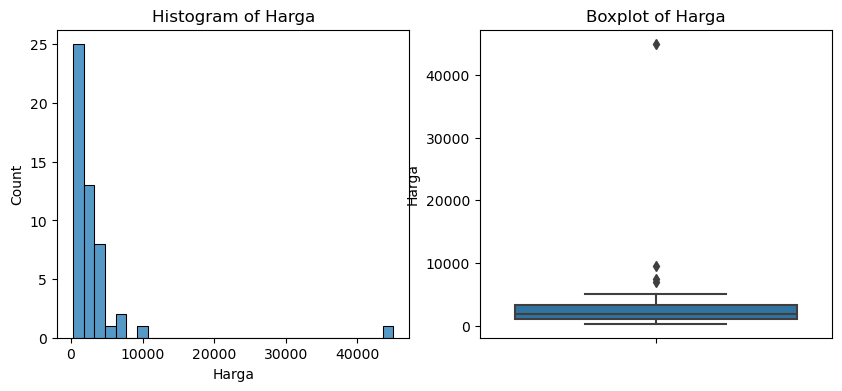

In [23]:
diagnostic_plots(df_empty_bedroom, 'Harga')

Insight = price does not seem to have any pattern unique to null bedroom listing, let's compare to the whole dataset.

Skewness value of Harga: 32.68724321713907
Mean value of Harga is 2366.191034482759
First Quartile is 875.0, Third Quartile is 2500.0, IQR is 1625.0, and 3xIQR is 4875.0
Outliers will be removed are those below -4000.0 and higher than 7375.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


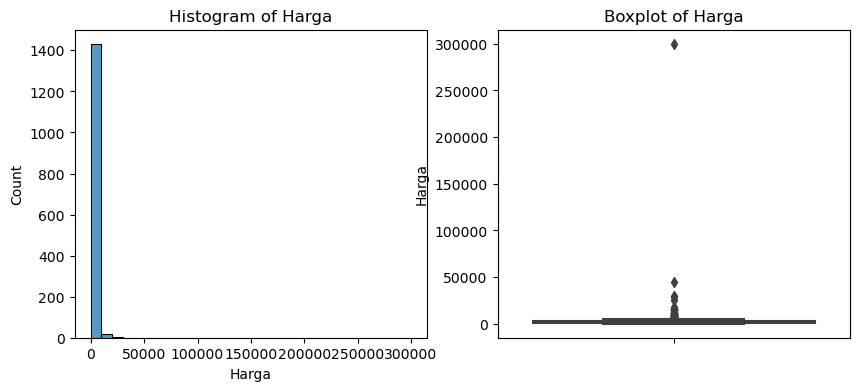

In [24]:
diagnostic_plots(df, 'Harga')

Insight = similar spread where **mostly sticks near zero**. Let's check if they're really the same with t-test.

In [25]:
# H0: average is same/similar
# H1: average is not same/similar

t_stat, p_val = stats.ttest_ind(df_empty_bedroom['Harga'],df['Harga'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 0.6667024485215477
P-value: 0.5050648156740206


Insight = t-test shows p-value of > 0.05, meaning the means are different between the empty bedroom and the overall data. This is due to how the overall data has more lower-priced houses proportionally compared to the empty bedroom data. 

This might mean that the null fields bedroom are those of higher prices?

### Area of land and building check

Skewness value of Luas Tanah: 3.9774477947127718
Mean value of Luas Tanah is 298.7647058823529
First Quartile is 139.5, Third Quartile is 307.0, IQR is 167.5, and 3xIQR is 502.5
Outliers will be removed are those below -363.0 and higher than 809.5


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


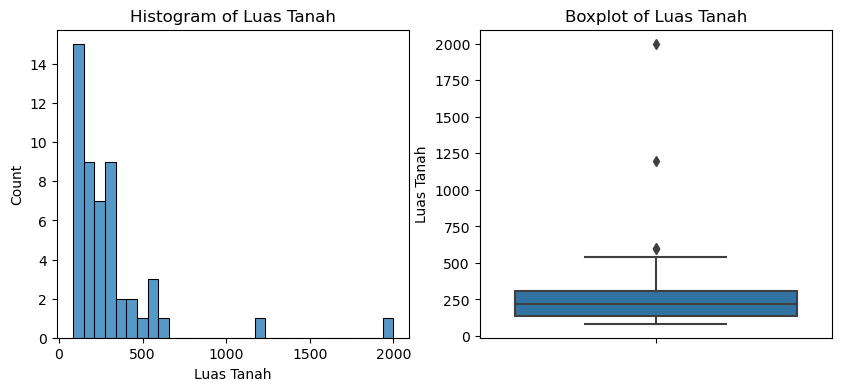

Skewness value of Luas Tanah: 36.13899677980408
Mean value of Luas Tanah is 270.70206896551724
First Quartile is 120.0, Third Quartile is 270.0, IQR is 150.0, and 3xIQR is 450.0
Outliers will be removed are those below -330.0 and higher than 720.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


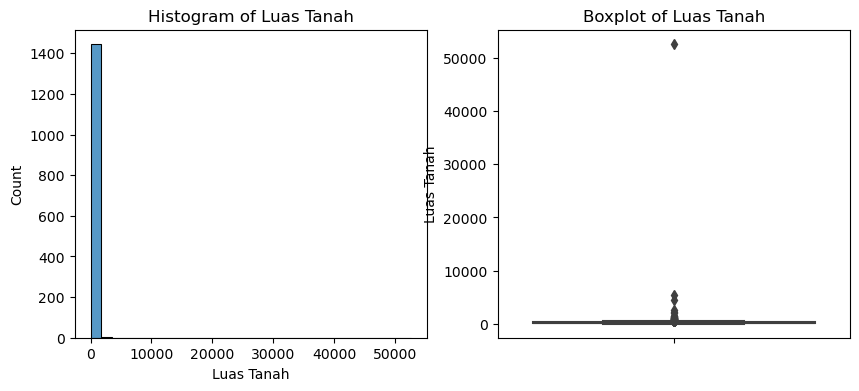

In [26]:
diagnostic_plots(df_empty_bedroom, 'Luas Tanah')
diagnostic_plots(df, 'Luas Tanah')

Skewness value of Luas Bangunan: 4.551490783405626
Mean value of Luas Bangunan is 263.84313725490193
First Quartile is 100.0, Third Quartile is 250.0, IQR is 150.0, and 3xIQR is 450.0
Outliers will be removed are those below -350.0 and higher than 700.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


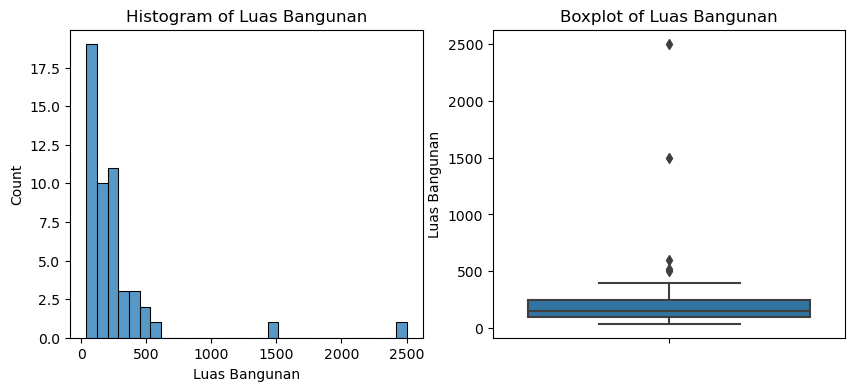

Skewness value of Luas Bangunan: 35.82284402143239
Mean value of Luas Bangunan is 204.05862068965519
First Quartile is 85.0, Third Quartile is 226.0, IQR is 141.0, and 3xIQR is 423.0
Outliers will be removed are those below -338.0 and higher than 649.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


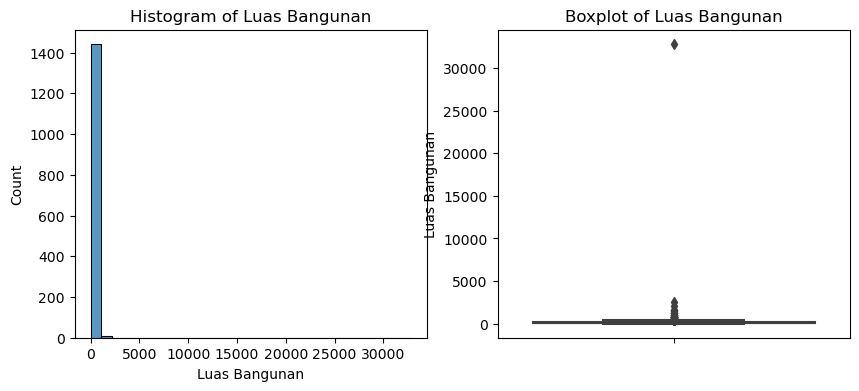

In [27]:
diagnostic_plots(df_empty_bedroom, 'Luas Bangunan')
diagnostic_plots(df, 'Luas Bangunan')

Insight = similar with price, the difference distribution of empty bedroom data and population data is hard to see as the there are really high outliers that makes the spread less visible. Though, the distribution of **sticking mostly to zero** is apparent in both plots.

In [28]:
print('Luas Tanah')
t_stat, p_val = stats.ttest_ind(df_empty_bedroom['Luas Tanah'],df['Luas Tanah'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)


# luas bangunan
print('Luas Bangunan')
t_stat, p_val = stats.ttest_ind(df_empty_bedroom['Luas Bangunan'],df['Luas Bangunan'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

Luas Tanah
T-Statistic: 0.1428822099731513
P-value: 0.8864024115492045
Luas Bangunan
T-Statistic: 0.4858627084209554
P-value: 0.6271355212935703


Insight = there are also difference in mean of the no_bedroom and whole data. This is again due to the sheer numbers of relatively smaller houses in the whole dataset compared to the no_bedroom sample.

THe author thinks there's not going to be any insightful outcome from comparing the averages because of said issue.

#### Side track: check the outliers of area of land and building

If we follow IQR outlier rule, a lot of... just big houses would be marked as outliers, so further investigation is needed. Though there are some extreme outliers that piqued the author's mind.

In [29]:
df[df['Luas Tanah'] > 15000]

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
19,19,RUMAH/VILLA/COTAGE /KEBUN BUAH SANGAT LUAS,1.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,10.0,6.0,52630,1000,NaN,Rumah,SHM - Sertifikat Hak Milik,1300 Watt,NaN,NaN,Tidak,Tidak,NaN,1.0,NaN,Tidak,NaN,PAM atau PDAM,Tidak,NaN,Dijual,NaN


Insight  = upon checking the data manually by opening the website, it seems that the poster is posting false price as the amount of land sold and the price does not make any sense.

The land was advertised as 100 m x 500 m in an image on the webpage. Written in the description, the seller is in dire need of cash, and were willing to sell for IDR 450,000/m2, which means the price would be over 22,5 billion IDR.

But who would bother with a listing that says 22.5 Billion IDR right? It won't gain the attention that the seller needed.

This listing is for land **plus** other buildings tho, so it shouldn't belong in the house dataset.

The author is advising to just drop this one outlier.

In [30]:
# drop the extremely large luas tanah
df = df[df['Luas Tanah'] < 15000]

In [31]:
# see one with extreme luas bangunan
df[df['Luas Bangunan'] > 3000]

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
1207,1345,Jual Cepat Hotel Menara Bahtera Di Kalimantan ...,300000.0,"Balikpapan Timur, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,99.0,99.0,5363,32835,NaN,Rumah,HGB - Hak Guna Bangunan,NaN,NaN,NaN,Ya,Ya,Furnished,19.0,Perkotaan,Ya,2 Mobil,Sumur Galian,Tidak,Bagus,Dijual,NaN


Insight =

Can you really call a hotel a house?

This outlier should be removed from the house listing dataset.

In [32]:
# drop the extremely large luas bangunan
df = df[df['Luas Bangunan'] < 3000]

### Comparing categorical features

#### Sertifikat

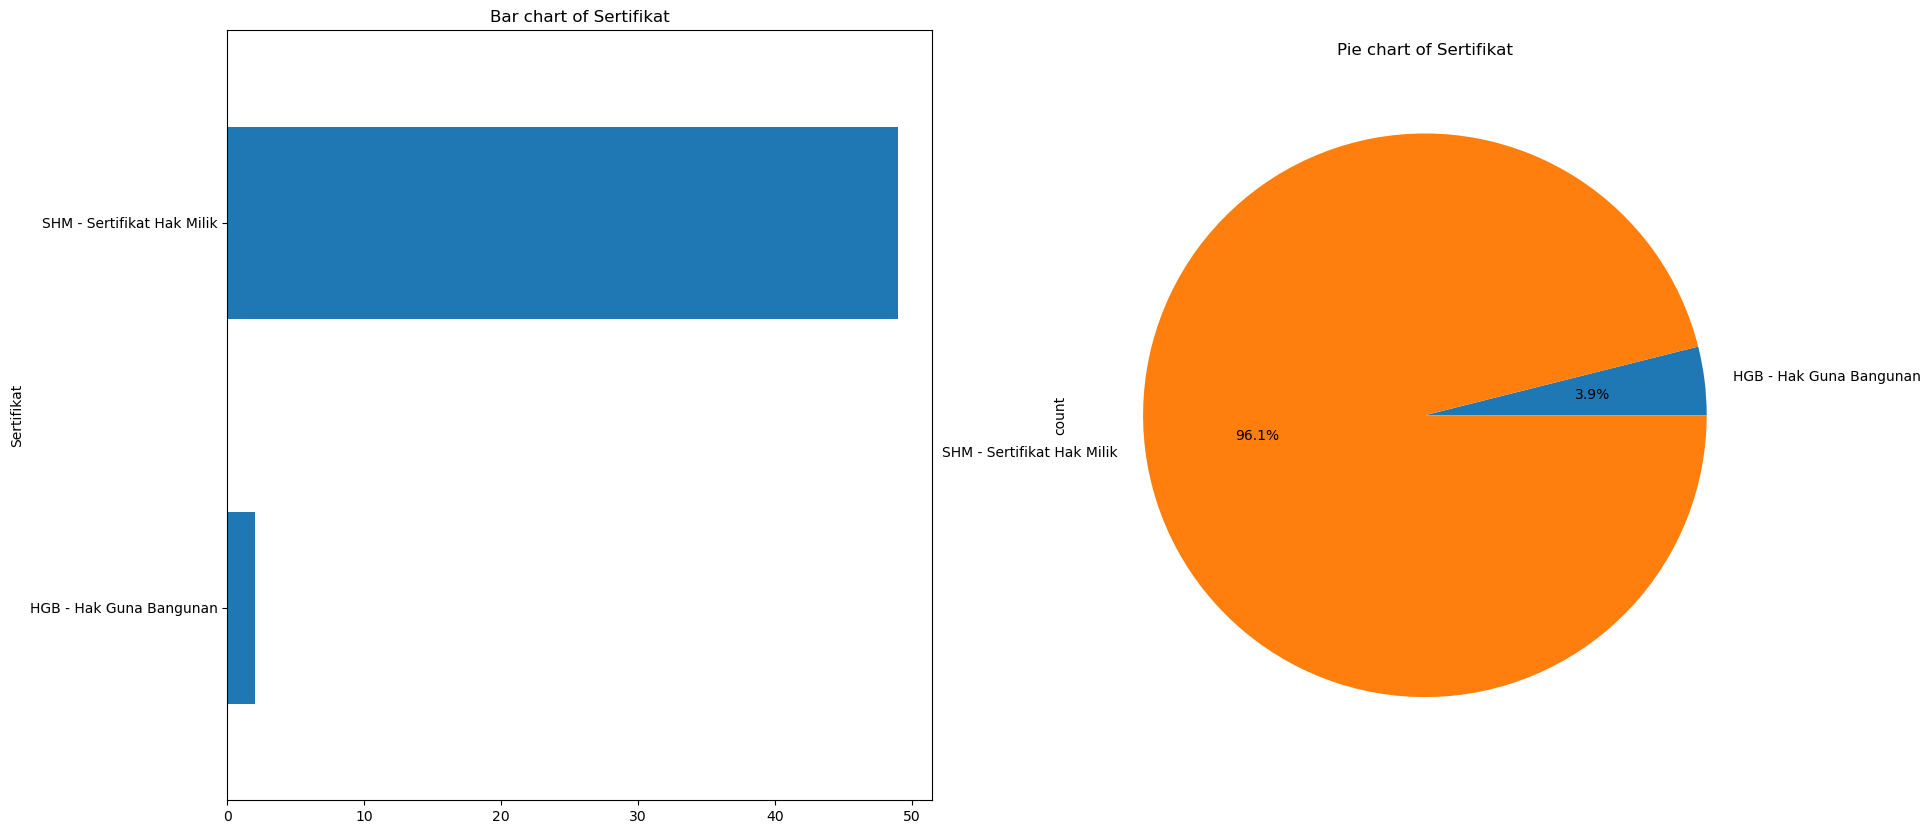

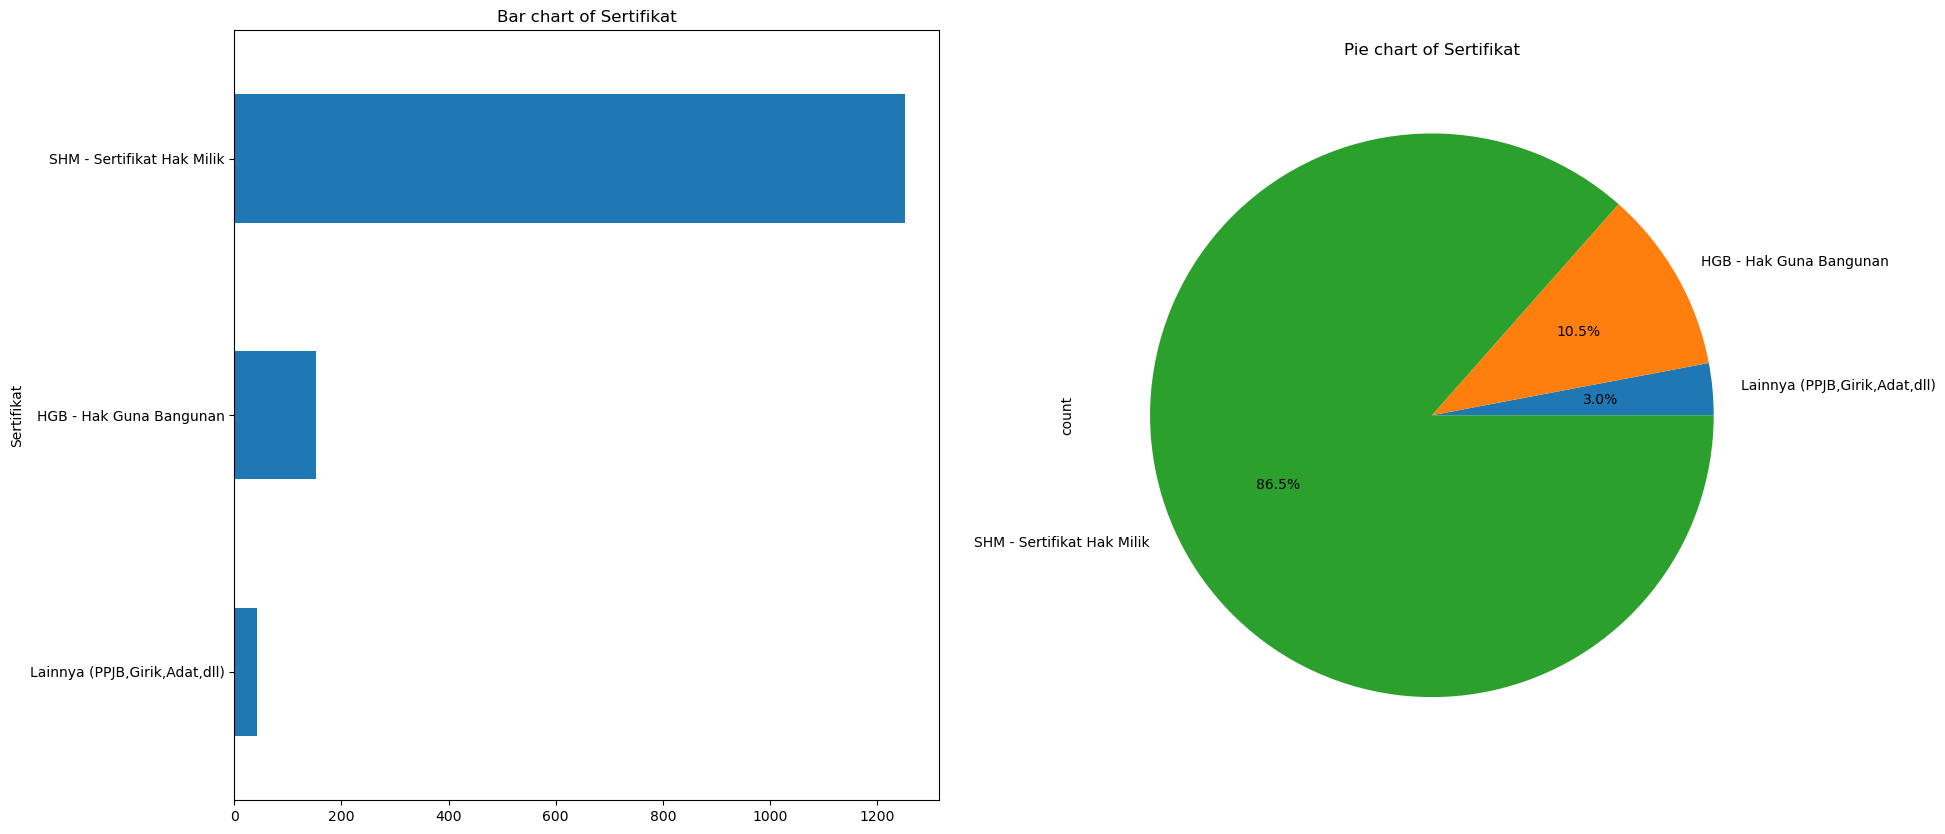

In [33]:
diagnostic_plots_categ(df_empty_bedroom, 'Sertifikat')
diagnostic_plots_categ(df, 'Sertifikat')

Insight = not different, **both have SHM as highest frequency followed by HGB**

#### Lokasi

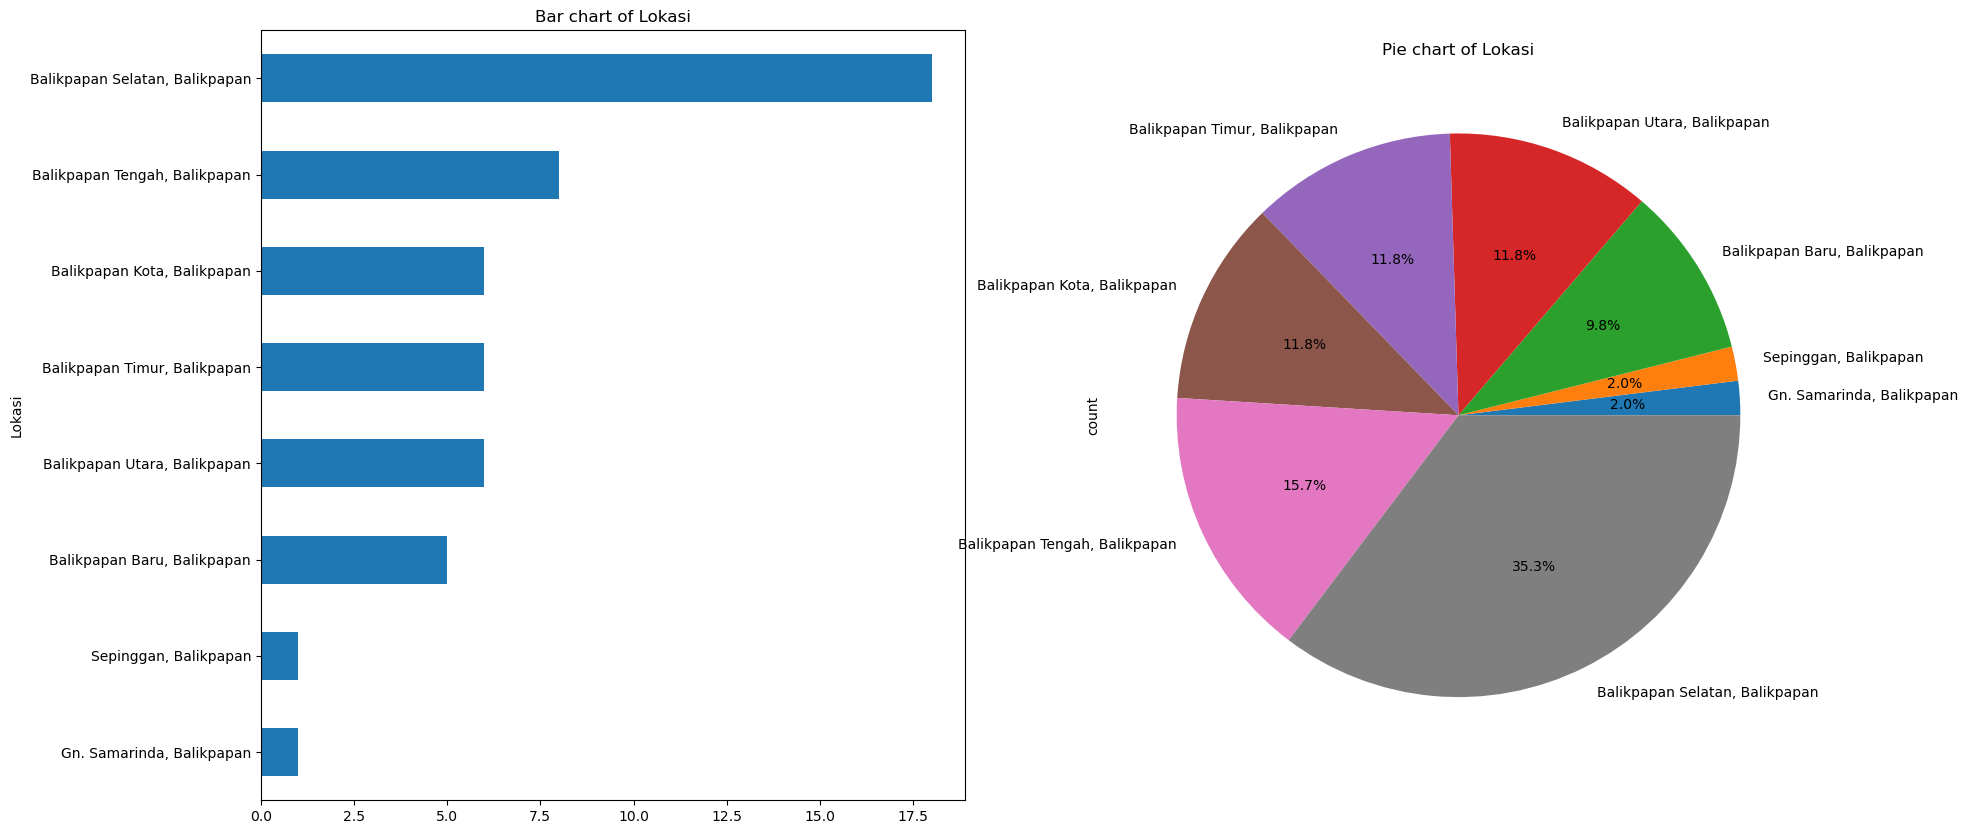

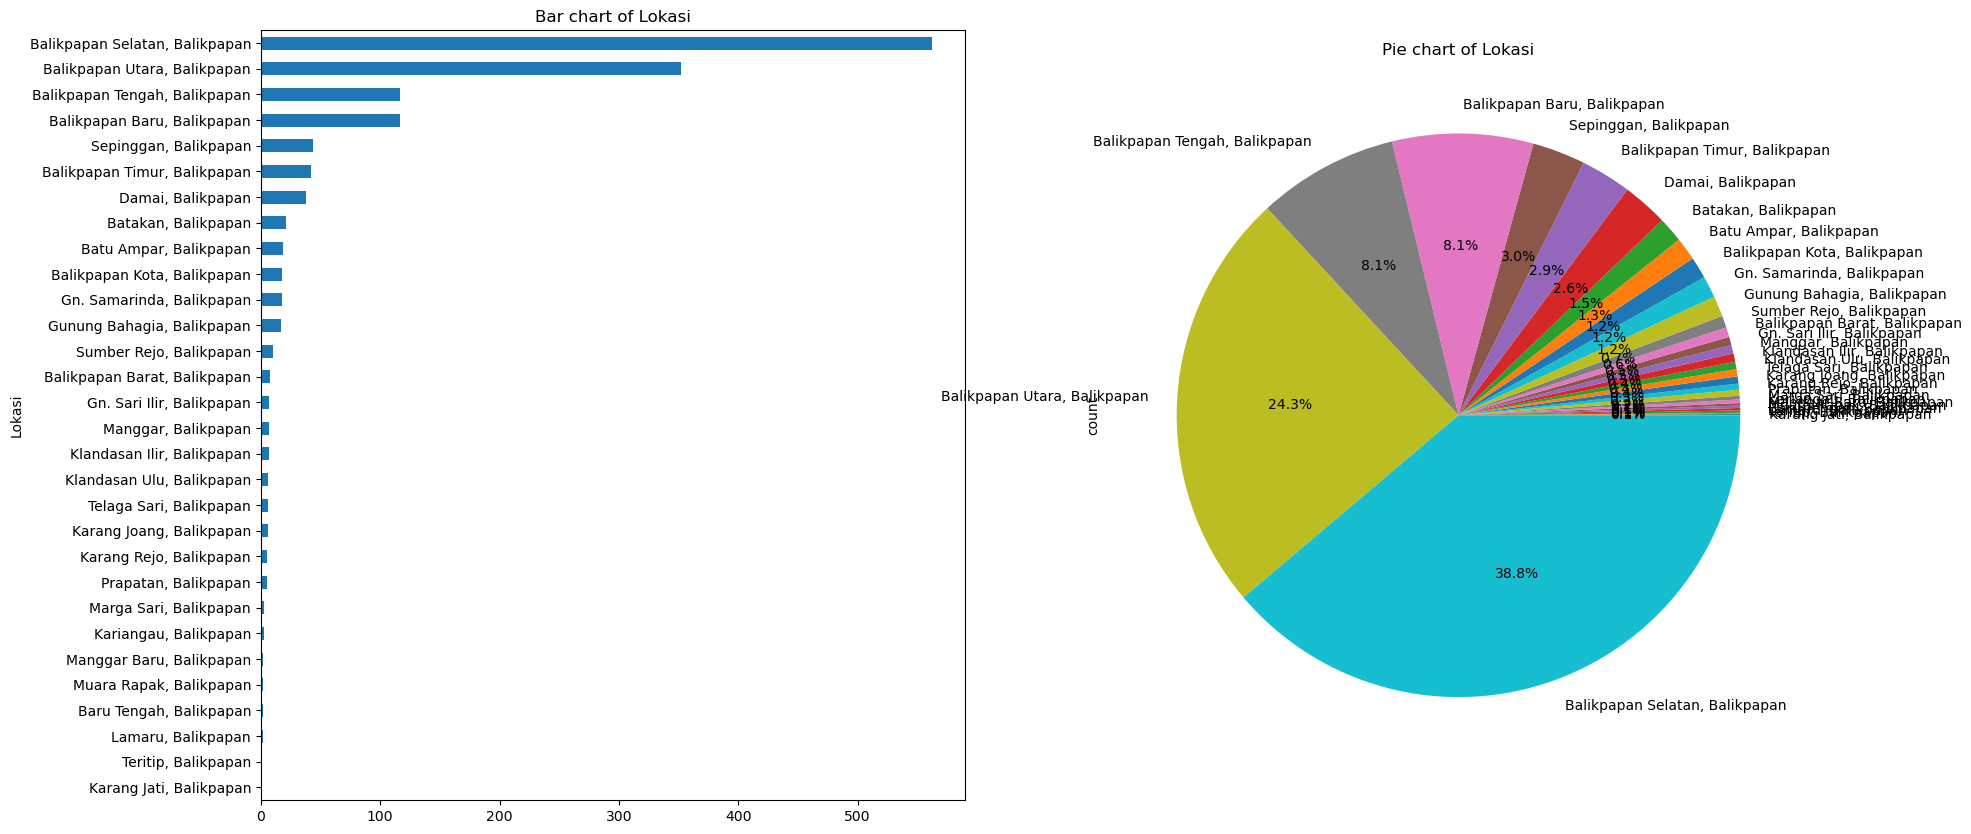

In [34]:
diagnostic_plots_categ(df_empty_bedroom, 'Lokasi')
diagnostic_plots_categ(df, 'Lokasi')

Insight = not much indication of difference or pattern from the location point of view too. **In both data they stay within mostly 'Balikpapan Selatan, Utara, Tengah, Baru, Timur'**

This plot also shows us that the location with the most listing is Balikpapan Selatan, followed by Utara, and Baru.

#### Daya Listrik

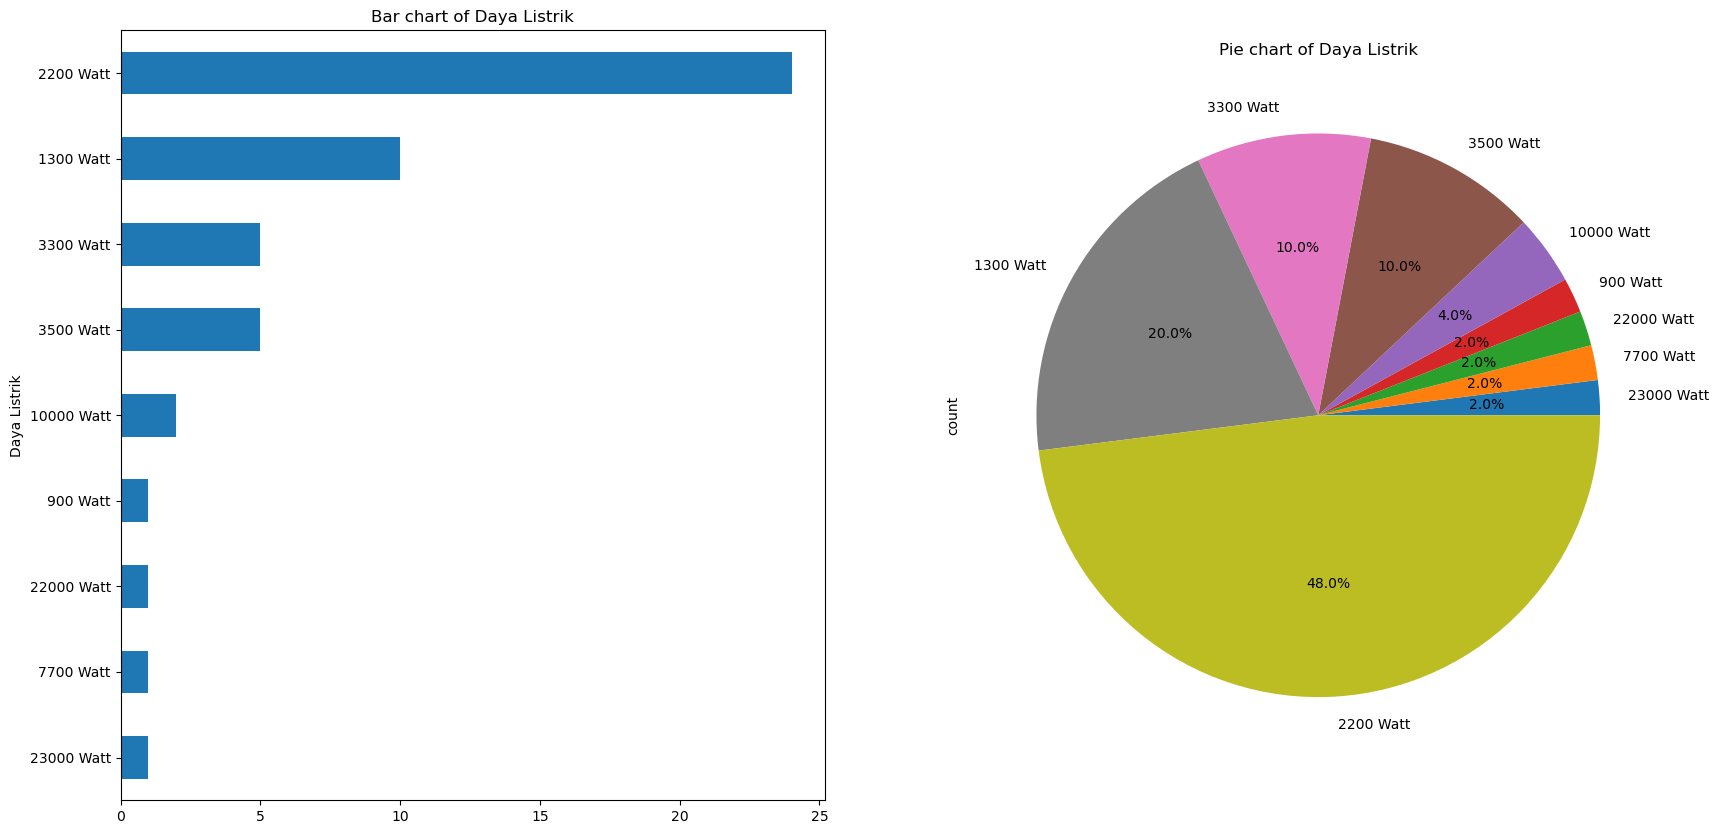

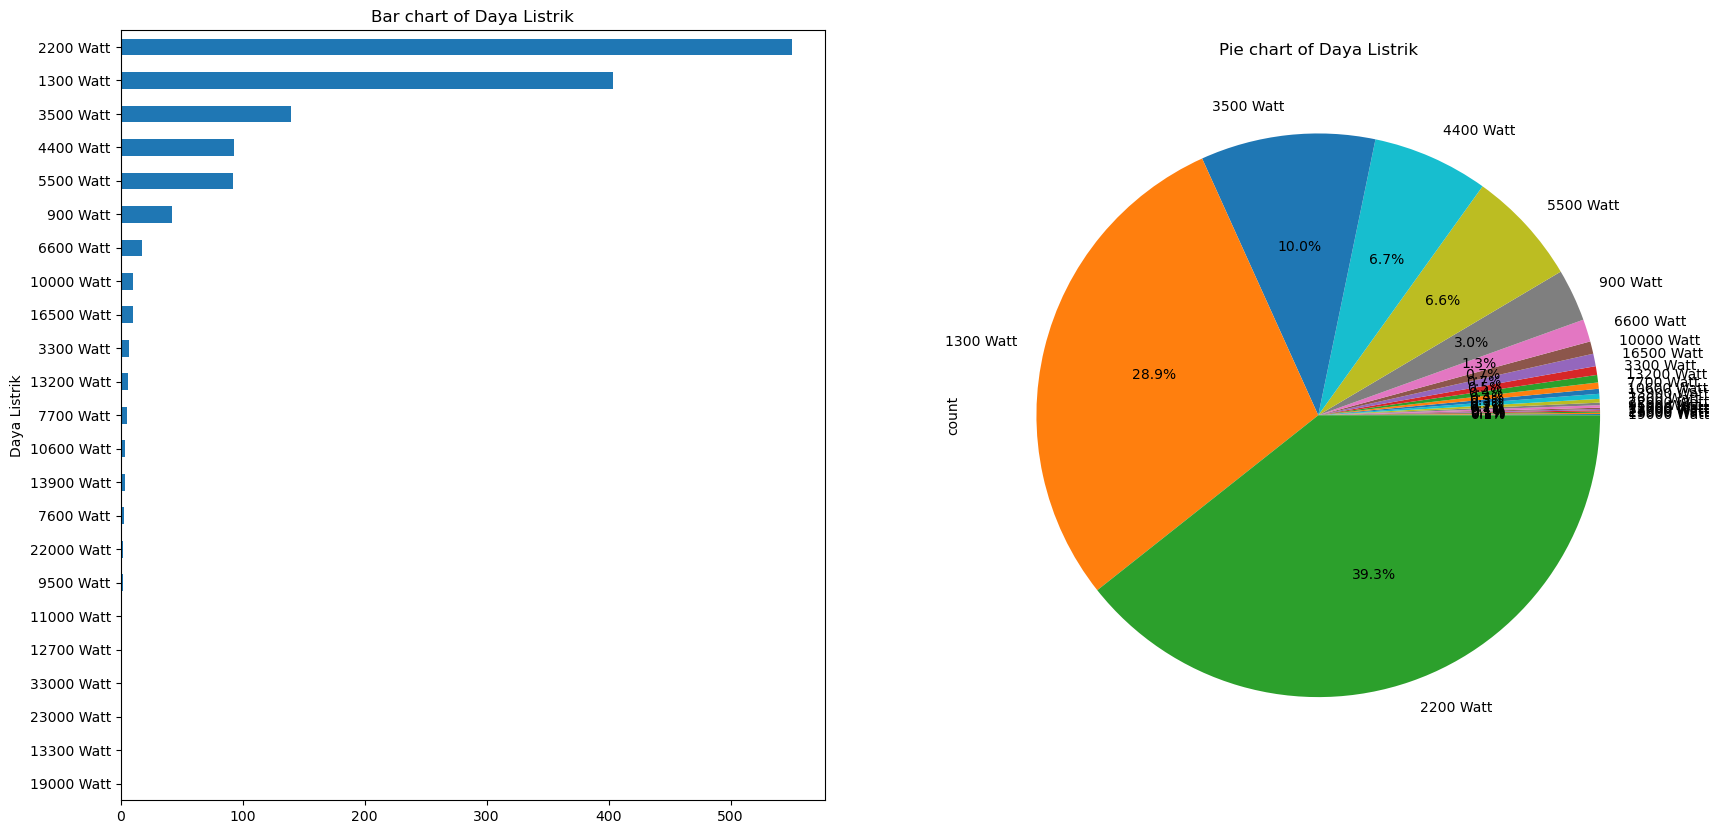

In [35]:
diagnostic_plots_categ(df_empty_bedroom, 'Daya Listrik')
diagnostic_plots_categ(df, 'Daya Listrik')

Insight = not much different as the **most frequent wattage in both data is 2200 and 1300** 

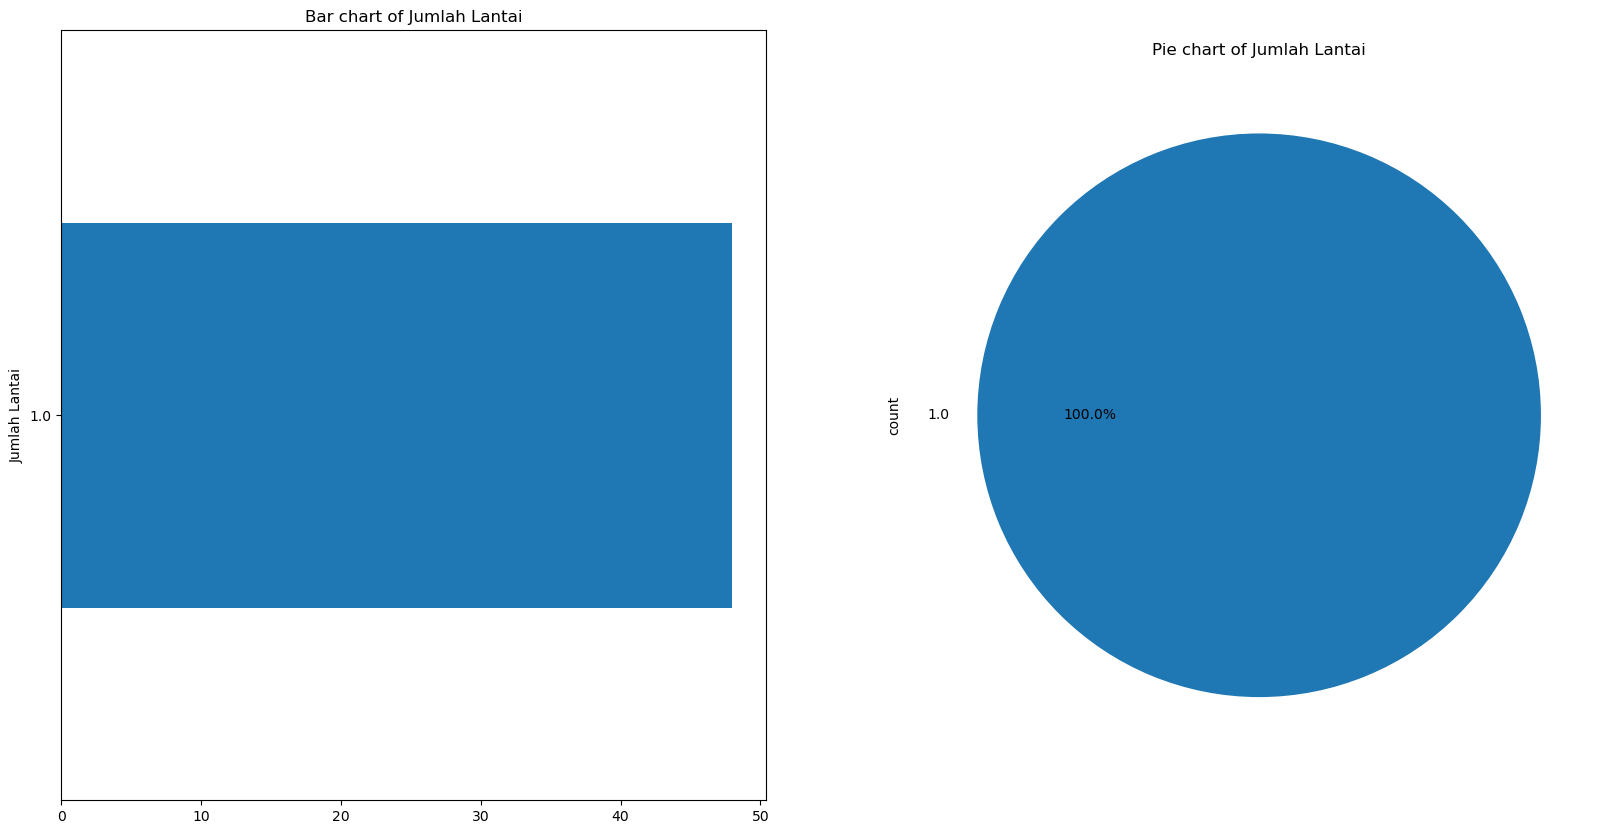

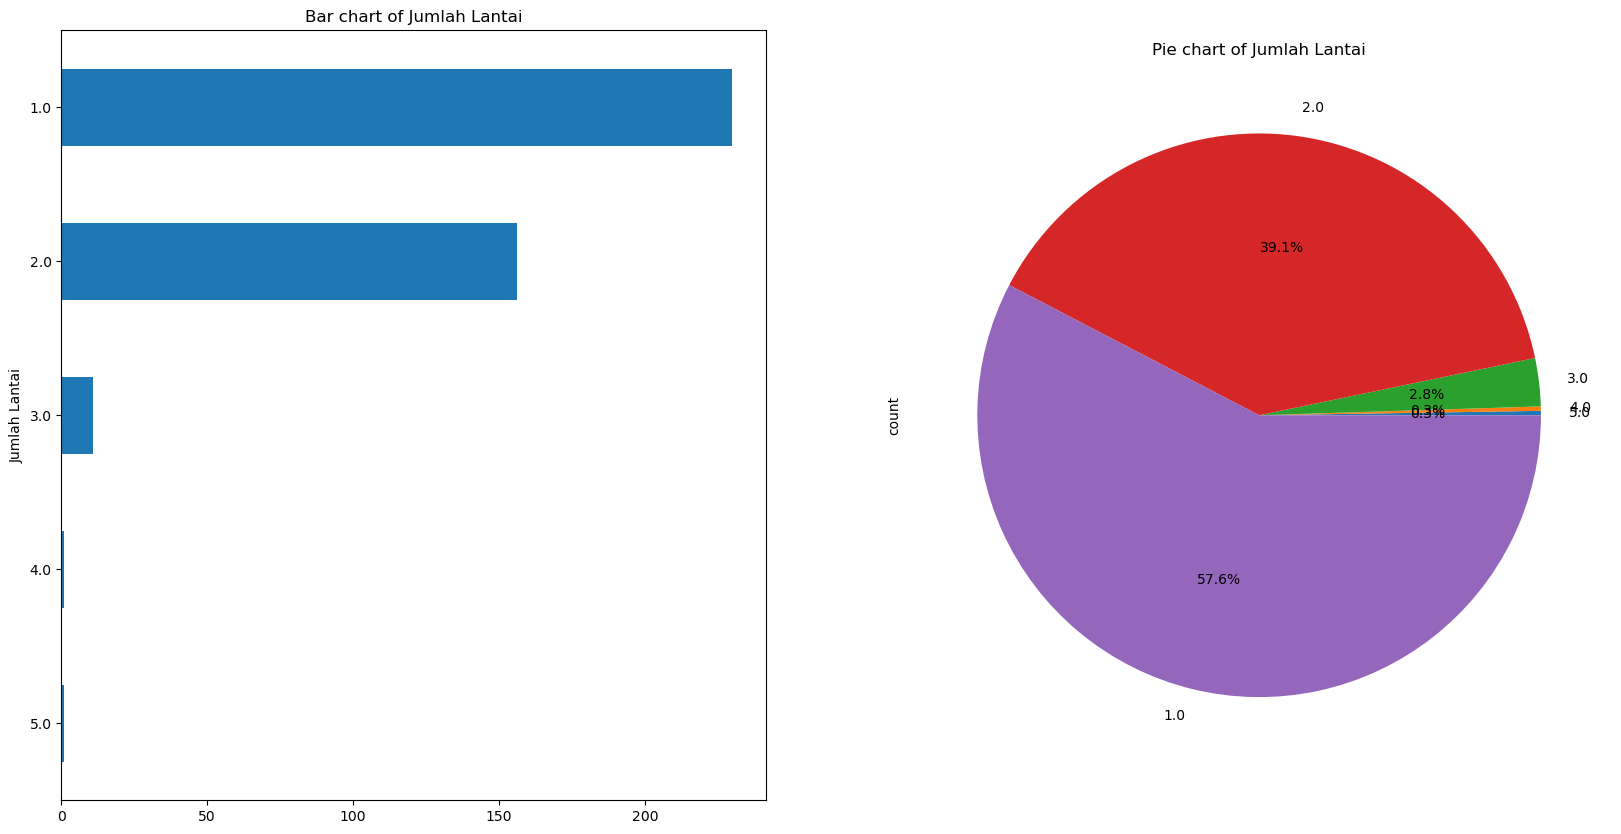

In [36]:
diagnostic_plots_categ(df_empty_bedroom, 'Jumlah Lantai')
diagnostic_plots_categ(df, 'Jumlah Lantai')

Insight = all bedroom_null data is of 1 floor houses, but this can be just a sampling luck as the whole dataset has over 58% 1 story houses.

### Conclusion

The missing data are not related to any other variable. The dataset with empty number-of-bedroom information have similar spreads in many numerical and categorical features.

**Therefore, we can conclude that the missing info of number of bedroom is Missing Completely At Random (MCAR)**

## Empty number-of-bathrooms investigation

In [37]:
# empty number of bedroom usually comes along with empty number of bathrooms. Let's see to prove.

df_empty_bedroom['Kamar Mandi'].value_counts()

Kamar Mandi
4.0    3
Name: count, dtype: int64

Insight = only 3 listings in empty-number-of-bedroom data lists their number of bathrooms. 

In [38]:
# check the non-empty-bathroom details

df_empty_bedroom[df_empty_bedroom['Kamar Mandi']>0]

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
495,522,RUMAH BARU SELESAI RENOVASI 2 LANTAI SIAP HUNI...,3100.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,NaN,4.0,200,250,NaN,Rumah,SHM - Sertifikat Hak Milik,3500 Watt,NaN,NaN,Tidak,Tidak,NaN,NaN,NaN,Tidak,NaN,NaN,Tidak,NaN,Dijual,21.0
497,524,RUMAH SULTAN CANTIK TERAWAT SIAP HUNI DI BALIK...,4700.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,NaN,4.0,538,250,NaN,Rumah,SHM - Sertifikat Hak Milik,3500 Watt,NaN,NaN,Tidak,Tidak,NaN,NaN,NaN,Tidak,NaN,NaN,Tidak,NaN,Dijual,23.0
587,632,INDRAKILA,4700.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,NaN,4.0,538,250,NaN,Rumah,SHM - Sertifikat Hak Milik,3500 Watt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual,131.0


Insight = all of these houses are pretty big houses with prices above 3 millions with land and building area above 200. They both happen to have 3500 watts of electricity.

They all happen to be posted by one same person. The rest of their listings have info on bedrooms and bathrooms, though. They probably just missed this one 

Anyway, the empty number of bathroom data is same as empty number of bedroom data, hence we can conclude that empty number of bathroom data is **Missing Completely At Random (MCAR)**

## Empty Electricity Information Investigation

In [39]:
# get data

df_empty_electric = df[df['Daya Listrik'].isnull()]
df_empty_electric.head()

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
16,16,1087. Dijual rumah murah di Perumahan Balikpap...,6500.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,10.0,719,800,NaN,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,1.0,Tidak,Tidak,Unfurnished,2.0,Pemukiman Warga,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
34,35,"Dijual Rumah Luas di Jalan Markoni Atas, Balik...",6500.0,"Balikpapan Kota, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,4.0,2.0,689,692,2.0,Rumah,SHM - Sertifikat Hak Milik,NaN,1.0,1.0,Ya,Ya,Unfurnished,2.0,Pemukiman Warga,Ya,2 Mobil,NaN,Tidak,Butuh Renovasi,Dijual,NaN
96,97,"Dijual Rumah di Balikpapan Baru Bb, Balikpapan",1850.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,165,165,1.0,Rumah,SHM - Sertifikat Hak Milik,NaN,1.0,1.0,Ya,Ya,Unfurnished,1.0,Perkotaan,Ya,2 Mobil,PAM atau PDAM,Tidak,Butuh Renovasi,Dijual,NaN
357,370,Ruman modern lokasi premium dan elite,3800.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,3.0,240,245,NaN,Rumah,SHM - Sertifikat Hak Milik,NaN,1.0,NaN,NaN,NaN,Unfurnished,1.0,NaN,NaN,NaN,NaN,NaN,Bagus Sekali,Dijual,NaN
358,371,"Rumah cantik minimalis, modern, lokasi ciputra...",3500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,5.0,300,300,NaN,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,NaN,NaN,NaN,Unfurnished,1.0,NaN,NaN,NaN,NaN,NaN,Bagus,Dijual,NaN


### Check prices

Skewness value of Harga: 3.462570990008239
Mean value of Harga is 4182.22
First Quartile is 1700.0, Third Quartile is 4500.0, IQR is 2800.0, and 3xIQR is 8400.0
Outliers will be removed are those below -6700.0 and higher than 12900.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


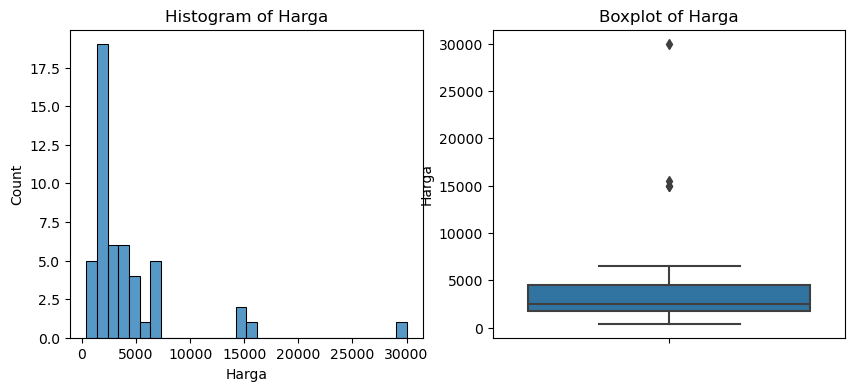

Skewness value of Harga: 6.533544311147391
Mean value of Harga is 2162.276243093923
First Quartile is 875.0, Third Quartile is 2500.0, IQR is 1625.0, and 3xIQR is 4875.0
Outliers will be removed are those below -4000.0 and higher than 7375.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


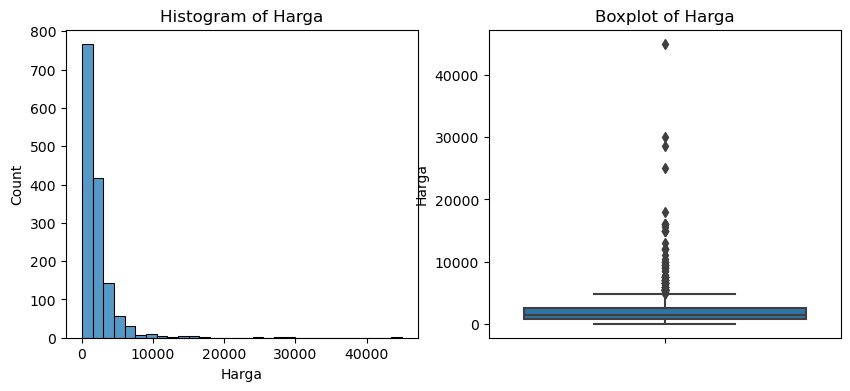

In [40]:
# check and compare prices

diagnostic_plots(df_empty_electric, 'Harga')
diagnostic_plots(df, 'Harga')

Insight = price wise, not much different in histogram with the whole dataset, where **they mostly stick to zero** though it's worth nothing that the mean is starkly different (9982 and 2359) is due to a lot of outliers with 300,000,000,000 prices are in the empty electricity data.

In [41]:
df_check_price = df[df['Harga'] < 7375]

Skewness value of Harga: 1.5325942120961358
Mean value of Harga is 1833.494301994302
First Quartile is 850.0, Third Quartile is 2400.0, IQR is 1550.0, and 3xIQR is 4650.0
Outliers will be removed are those below -3800.0 and higher than 7050.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


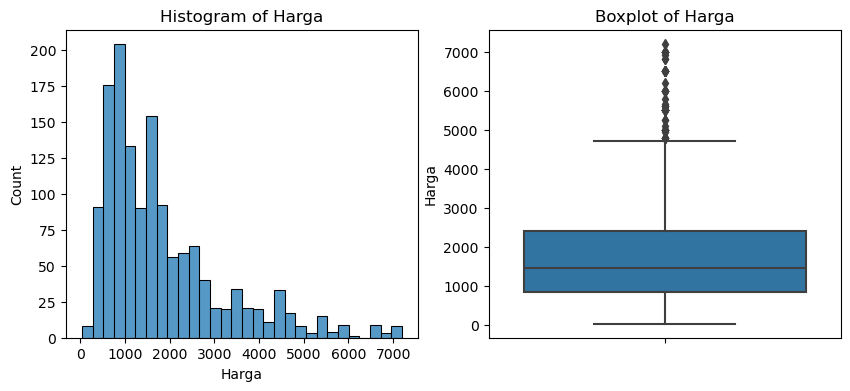

In [42]:
diagnostic_plots(df_check_price, 'Harga')

### Check area of land and building

Skewness value of Luas Tanah: 1.8858007082551445
Mean value of Luas Tanah is 361.46
First Quartile is 160.0, Third Quartile is 497.5, IQR is 337.5, and 3xIQR is 1012.5
Outliers will be removed are those below -852.5 and higher than 1510.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


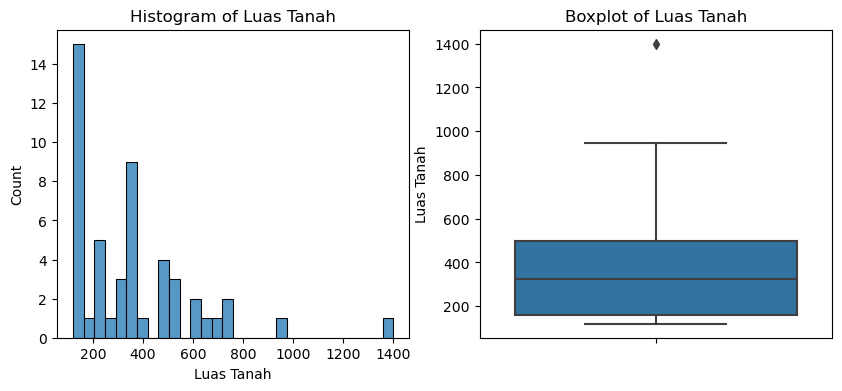

Skewness value of Luas Tanah: 7.642130447306328
Mean value of Luas Tanah is 231.02555248618785
First Quartile is 120.0, Third Quartile is 268.5, IQR is 148.5, and 3xIQR is 445.5
Outliers will be removed are those below -325.5 and higher than 714.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


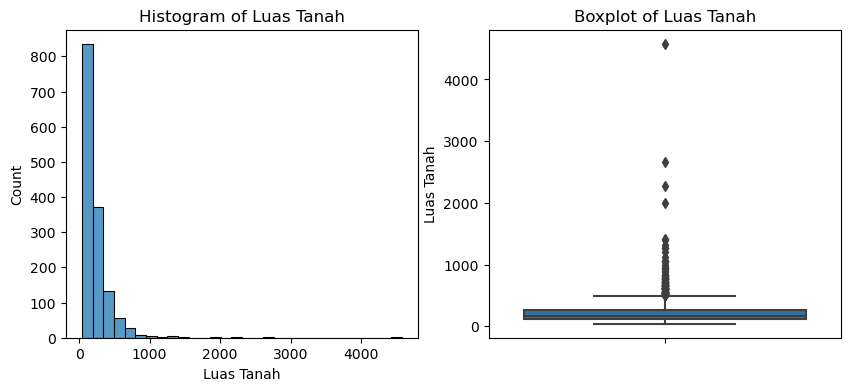

In [43]:
diagnostic_plots(df_empty_electric, 'Luas Tanah')
diagnostic_plots(df, 'Luas Tanah')

Insight = similar spread between luas tanah of empty electricity dataset and whole data where ***most stick close to zero and below 5000**

Skewness value of Luas Bangunan: 1.3119739189859643
Mean value of Luas Bangunan is 290.3
First Quartile is 145.0, Third Quartile is 303.75, IQR is 158.75, and 3xIQR is 476.25
Outliers will be removed are those below -331.25 and higher than 780.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


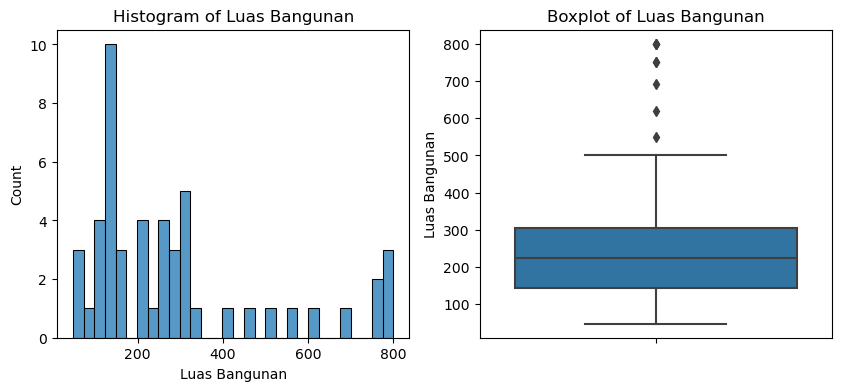

Skewness value of Luas Bangunan: 4.96193282359614
Mean value of Luas Bangunan is 180.97375690607734
First Quartile is 85.0, Third Quartile is 226.0, IQR is 141.0, and 3xIQR is 423.0
Outliers will be removed are those below -338.0 and higher than 649.0


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


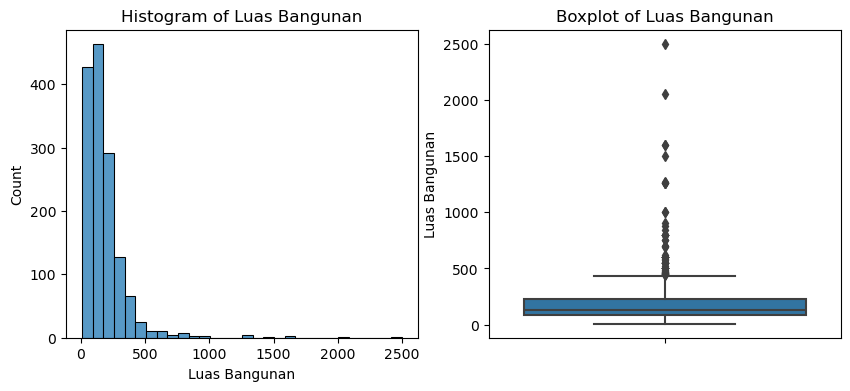

In [44]:
diagnostic_plots(df_empty_electric, 'Luas Bangunan')
diagnostic_plots(df, 'Luas Bangunan')

Insight = There seems to be more building of > 500 square meters in the empty electricity information, though remembering how the data has more smaller size houses, and hence will have those closer to zero, this can be just sampling luck,

Though, on a note, the two still has the same pattern of **mostly sticking to 0 and below 1000**

### Check number of rooms

Skewness value of Kamar Tidur: 4.254239937089478
Mean value of Kamar Tidur is nan
First Quartile is nan, Third Quartile is nan, IQR is nan, and 3xIQR is nan
Outliers will be removed are those below nan and higher than nan


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


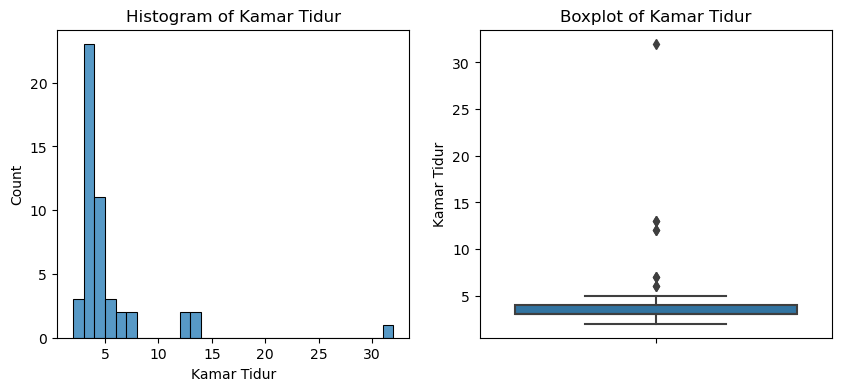

Skewness value of Kamar Tidur: 6.282618936575411
Mean value of Kamar Tidur is nan
First Quartile is nan, Third Quartile is nan, IQR is nan, and 3xIQR is nan
Outliers will be removed are those below nan and higher than nan


c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


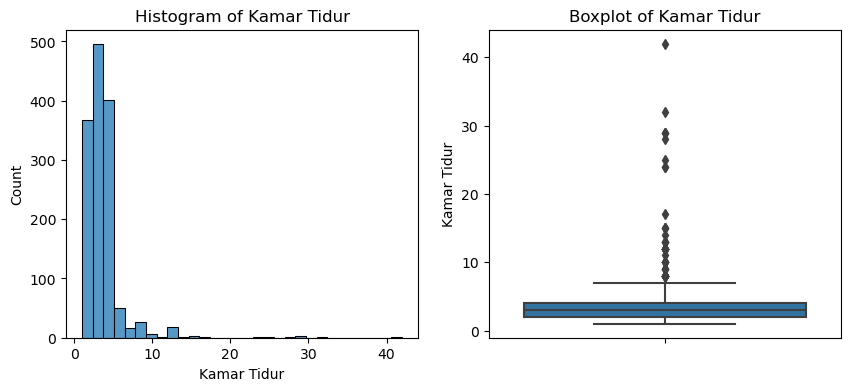

In [45]:
diagnostic_plots(df_empty_electric, 'Kamar Tidur')
diagnostic_plots(df, 'Kamar Tidur')

Insight = though they all stick closer to zero, the empty-electricity-data is seen to be more prevalent on those with large number of rooms. Let's review those.

In [46]:
df_empty_electric[df_empty_electric['Kamar Tidur'] > 10]

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Carport,Tipe Properti,Sertifikat,Daya Listrik,Kamar Pembantu,Dapur,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
16,16,1087. Dijual rumah murah di Perumahan Balikpap...,6500.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,10.0,719,800,NaN,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,1.0,Tidak,Tidak,Unfurnished,2.0,Pemukiman Warga,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
360,373,"Kost Baru + Rumah 2 lantai, 28 + 4 Kamar di Gu...",3000.0,"Balikpapan Tengah, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,32.0,NaN,525,305,NaN,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,NaN,Tidak,Tidak,Furnished,NaN,NaN,Tidak,NaN,NaN,Tidak,Butuh Renovasi,Dijual,NaN
949,1049,Rumah Mess Super Luas Strategis di Balikpapan ...,1450.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,13.0,3.0,150,260,1.0,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,1.0,Ya,Ya,Furnished,2.0,Perkotaan,Tidak,NaN,NaN,Tidak,Bagus,Dijual,NaN
1395,946,1087. Dijual rumah murah di Perumahan Balikpap...,6500.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,10.0,719,800,NaN,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,1.0,Tidak,Tidak,Unfurnished,1.0,Pemukiman Warga,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,Dijual,169.0
1404,1050,Rumah Mess Super Luas Strategis di Balikpapan ...,1450.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,13.0,3.0,150,260,1.0,Rumah,SHM - Sertifikat Hak Milik,NaN,NaN,1.0,Ya,Ya,Furnished,2.0,Perkotaan,Ya,2 Mobil,NaN,Tidak,Bagus,Dijual,NaN


Insight = a lot of duplicates. Though aside from their number of rooms, which is correlated with price, area of land and building, there seem to be no clear pattern on why electricity data is empty.

### Check categoricals

#### Sertifikat

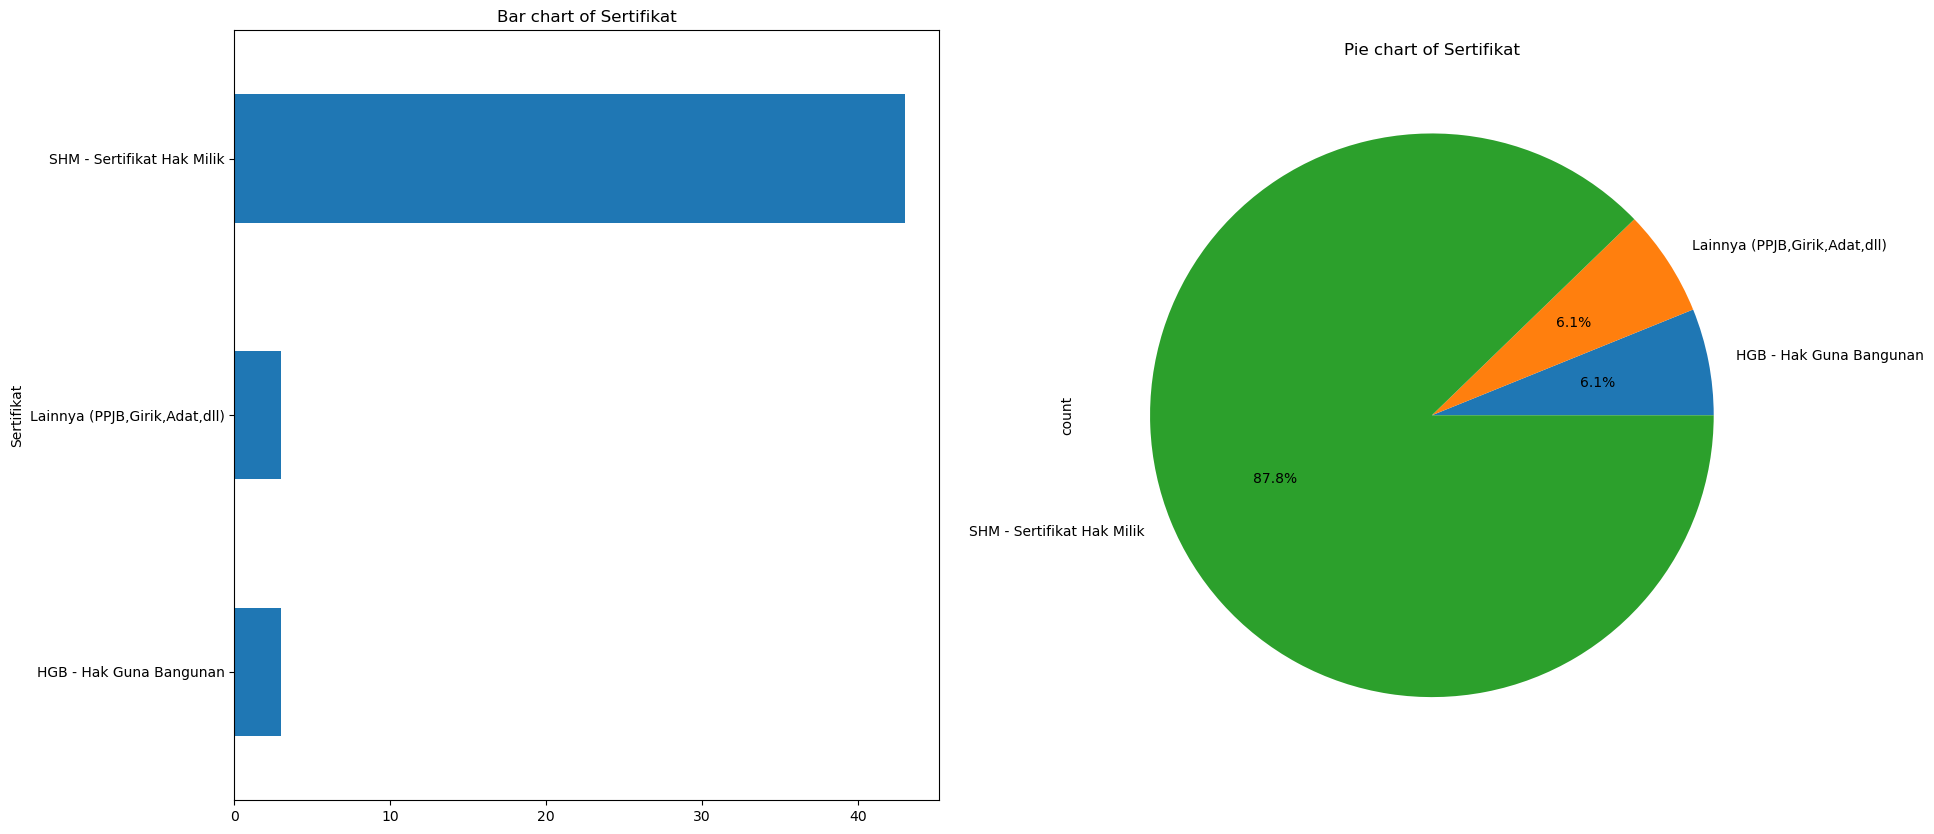

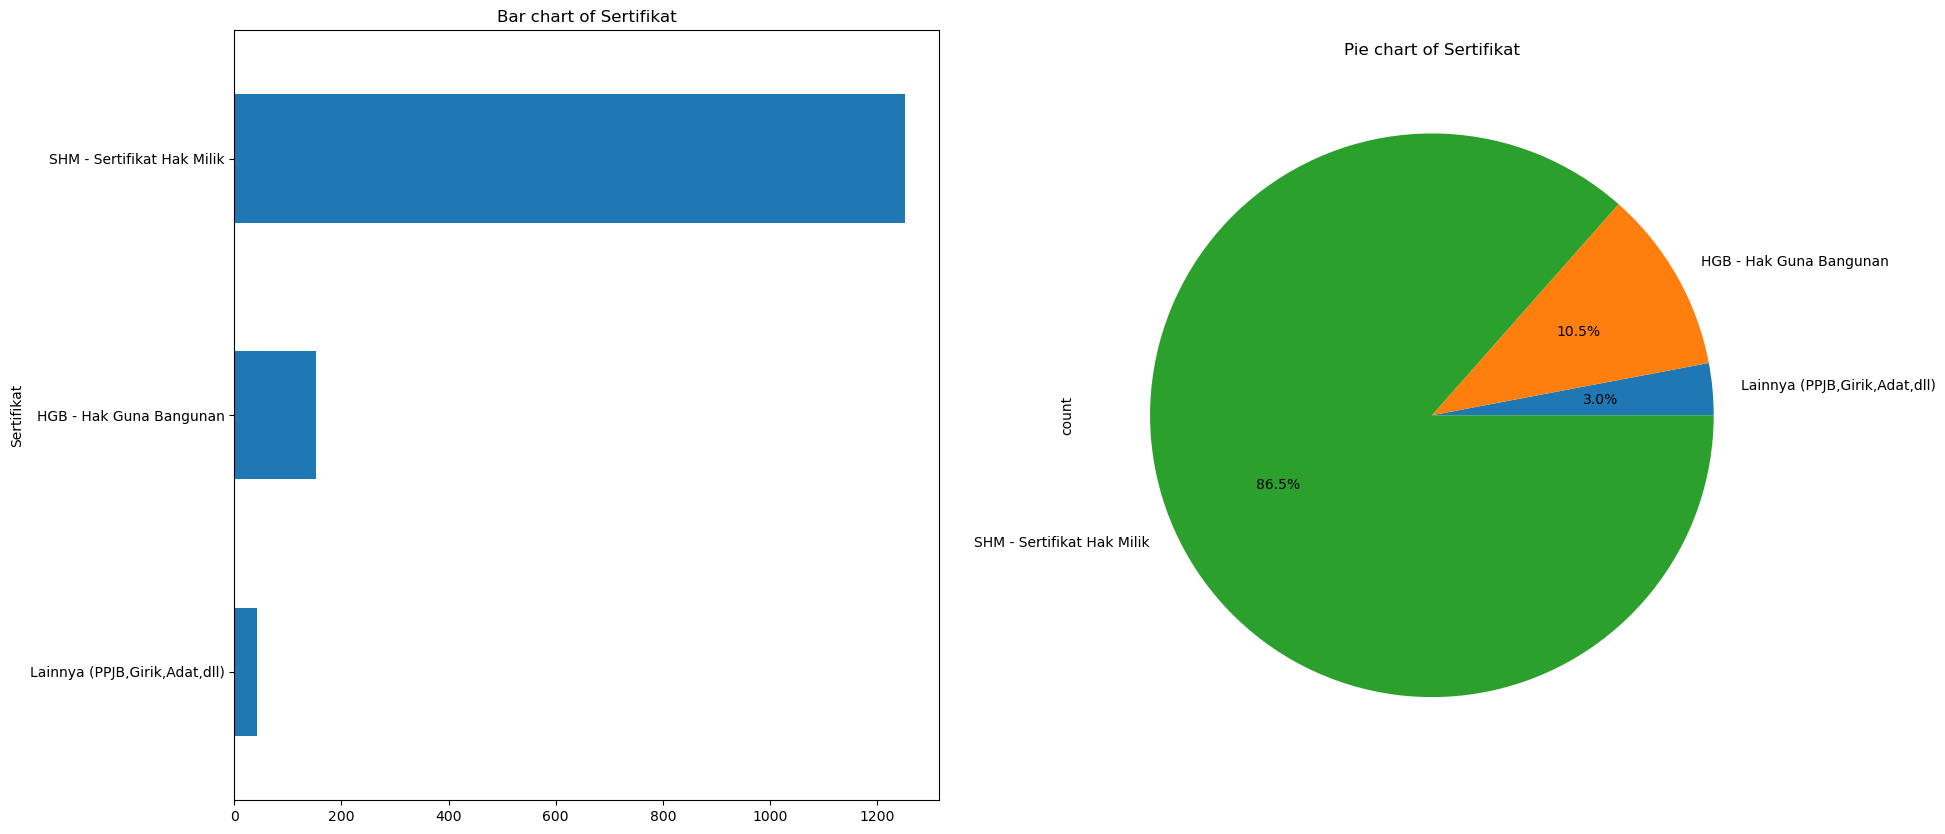

In [47]:
diagnostic_plots_categ(df_empty_electric, 'Sertifikat')
diagnostic_plots_categ(df, 'Sertifikat')

Insight = **similar spread between the two data, no unique identifier in empty electricity data**

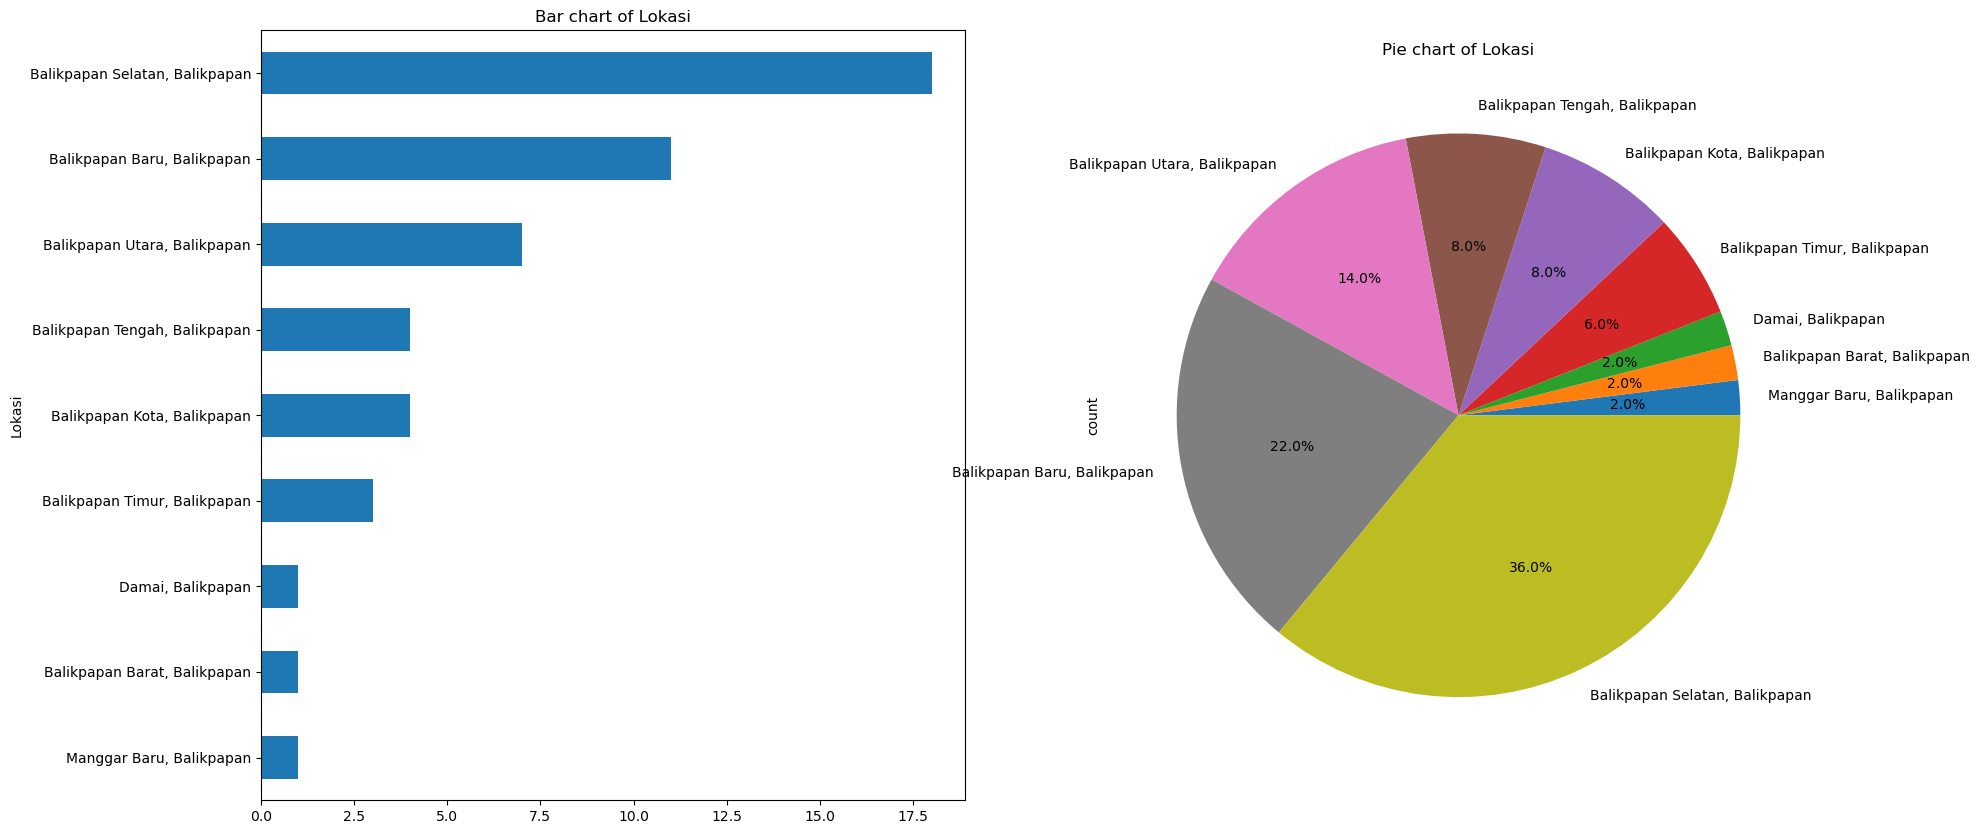

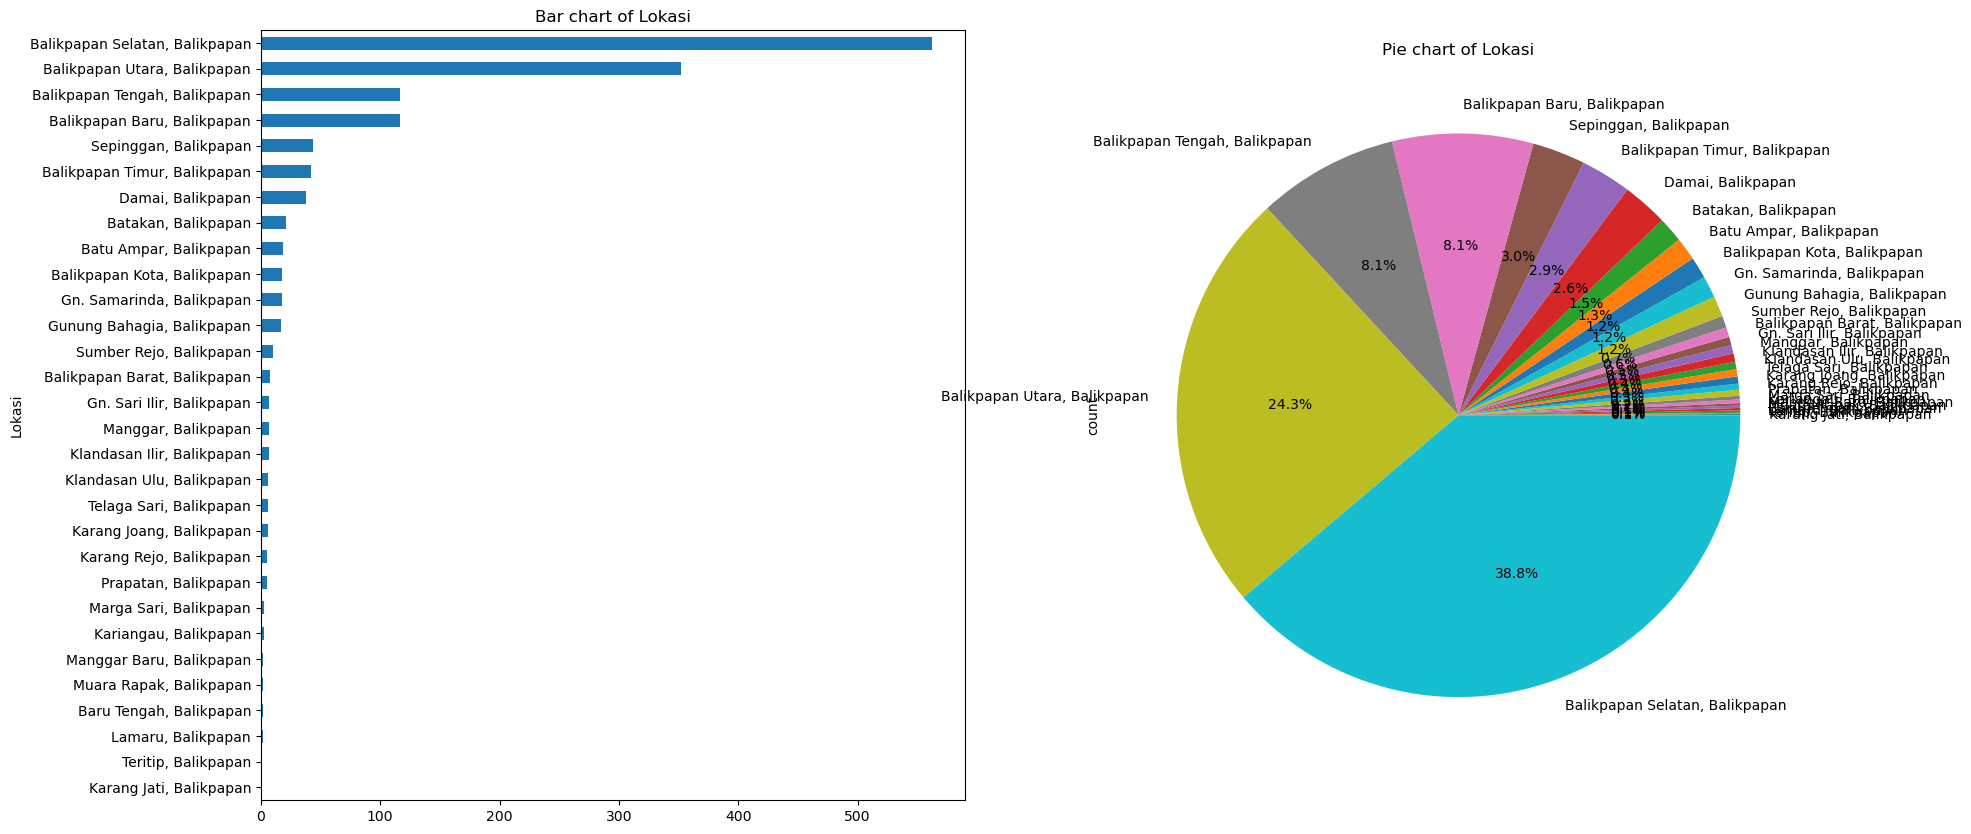

In [48]:
diagnostic_plots_categ(df_empty_electric, 'Lokasi')
diagnostic_plots_categ(df, 'Lokasi')

Insight = similar location in spread where **most stays within Balikpapan Selatan, Utara, Baru, Tengah, Kota, and Timur**

### Conclusion

**No major difference between data of empty electricity info and whole data, empty eelctrictity data is Missing Completely At Random (MCAR)**

# Thinking about dropping...

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 1449
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1448 non-null   int64  
 1   Judul                1448 non-null   object 
 2   Harga                1448 non-null   float64
 3   Lokasi               1448 non-null   object 
 4   Hyperlink            1448 non-null   object 
 5   Img_Hyperlink        1448 non-null   object 
 6   Kamar Tidur          1397 non-null   float64
 7   Kamar Mandi          1396 non-null   float64
 8   Luas Tanah           1448 non-null   int32  
 9   Luas Bangunan        1448 non-null   int32  
 10  Carport              256 non-null    float64
 11  Tipe Properti        1448 non-null   object 
 12  Sertifikat           1447 non-null   object 
 13  Daya Listrik         1398 non-null   object 
 14  Kamar Pembantu       245 non-null    float64
 15  Dapur                230 non-null    float6

We can clear out a lot of columns that doesn't really serve anything in knowing of price or have too many empty data that there's practically no stories to tell, such as:

- Carport
- Kamar Pembantu
- Dapur
- Ruang Makan
- Ruang Tamu
- Kondisi Perabotan
- Pemandangan
- Terjangkau Internet
- Sumber Air
- Hook
- Kondisi Properti

And also to drop the ones with kost and hotel in the title

In [50]:
# dropping irrelevant features
# also dropping the tipe properti and tipe iklan because they all are same across all rows, 'Rumah' and 'Dijual'

df.drop(['Carport' , 'Kamar Pembantu', 'Dapur', 
         'Ruang Makan', 'Ruang Tamu', 'Kondisi Perabotan', 
         'Pemandangan', 'Terjangkau Internet', 'Sumber Air', 
         'Hook', 'Kondisi Properti', 'Jumlah Lantai','Lebar Jalan', 
         'Tipe Iklan','Tipe Properti', 'Unnamed: 0.1'], axis='columns', inplace=True)

In [51]:
# see state of data after drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1448 non-null   int64  
 1   Judul          1448 non-null   object 
 2   Harga          1448 non-null   float64
 3   Lokasi         1448 non-null   object 
 4   Hyperlink      1448 non-null   object 
 5   Img_Hyperlink  1448 non-null   object 
 6   Kamar Tidur    1397 non-null   float64
 7   Kamar Mandi    1396 non-null   float64
 8   Luas Tanah     1448 non-null   int32  
 9   Luas Bangunan  1448 non-null   int32  
 10  Sertifikat     1447 non-null   object 
 11  Daya Listrik   1398 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 135.8+ KB


We're thinking of dropping the data with empty number of bedrooms, bathrooms and electricity too. let's see how many data there are.

In [52]:
# to see how many empty data
len(df_empty_electric.index)

50

In [53]:
# to see how many empty bedroom data
len(df_empty_bedroom)

51

Insight = as we've seen in df_empty_bedroom, most of empty bedroom data also has empty bathroom data, so, we can conclude that if we drop rows with the empty bedroom, bathroom, and electricity data, we will still have around 1300 data 

In [54]:
# dropping empty bedroom, bathroom, and electricity data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1345 non-null   int64  
 1   Judul          1345 non-null   object 
 2   Harga          1345 non-null   float64
 3   Lokasi         1345 non-null   object 
 4   Hyperlink      1345 non-null   object 
 5   Img_Hyperlink  1345 non-null   object 
 6   Kamar Tidur    1345 non-null   float64
 7   Kamar Mandi    1345 non-null   float64
 8   Luas Tanah     1345 non-null   int32  
 9   Luas Bangunan  1345 non-null   int32  
 10  Sertifikat     1345 non-null   object 
 11  Daya Listrik   1345 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 126.1+ KB


Let's drop the kost-kostan next, and a hotel--one hotel has been removed by excluding excessively high area of land and area of building data from the dataset.

In [55]:
#drop the kost and the hotel

df = df[~df['Judul'].str.contains("KOST")]
df = df[~df['Judul'].str.contains("Kost")]
df = df[~df['Judul'].str.contains("kost")]
df = df[~df['Judul'].str.contains("KOST2AN")]
df = df[~df['Judul'].str.contains("DIJUAL HOTEL DI PUSAT")]

In [56]:
# see shape of data after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1326 non-null   int64  
 1   Judul          1326 non-null   object 
 2   Harga          1326 non-null   float64
 3   Lokasi         1326 non-null   object 
 4   Hyperlink      1326 non-null   object 
 5   Img_Hyperlink  1326 non-null   object 
 6   Kamar Tidur    1326 non-null   float64
 7   Kamar Mandi    1326 non-null   float64
 8   Luas Tanah     1326 non-null   int32  
 9   Luas Bangunan  1326 non-null   int32  
 10  Sertifikat     1326 non-null   object 
 11  Daya Listrik   1326 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 124.3+ KB


Let's see if there are any duplicated titles

In [57]:
# see if there are any duplicated titles
df['Judul'].duplicated().value_counts()

Judul
False    1310
True       16
Name: count, dtype: int64

In [58]:
# drop the duplicates that are in Judul
df = df.drop_duplicates(subset=['Judul'], keep='first')

In [59]:
# see change
df['Judul'].duplicated().value_counts()

Judul
False    1310
Name: count, dtype: int64

In [60]:
# see change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1310 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1310 non-null   int64  
 1   Judul          1310 non-null   object 
 2   Harga          1310 non-null   float64
 3   Lokasi         1310 non-null   object 
 4   Hyperlink      1310 non-null   object 
 5   Img_Hyperlink  1310 non-null   object 
 6   Kamar Tidur    1310 non-null   float64
 7   Kamar Mandi    1310 non-null   float64
 8   Luas Tanah     1310 non-null   int32  
 9   Luas Bangunan  1310 non-null   int32  
 10  Sertifikat     1310 non-null   object 
 11  Daya Listrik   1310 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 122.8+ KB


In [62]:
# save to csv
df.to_csv('./clean_rumah123_data_single_concated.csv')